# Lending Club Case Study

## 1. Data Understanding

1. Problem Statement
2. Objectives
3. Understanding the dataset
4. Dataset Attributes

### 1.1. Problem Statement

Lending Club, a consumer finance marketplace specializing in offering a variety of loans to urban customers, faces a critical challenge in managing its loan approval process. When evaluating loan applications, the company must make sound decisions to minimize financial losses, primarily stemming from loans extended to applicants who are considered "risky."

These financial losses, referred to as credit losses, occur when borrowers fail to repay their loans or default. In simpler terms, borrowers labeled as "charged-off" are the ones responsible for the most significant losses to the company.

The primary objective of this exercise is to assist Lending Club in mitigating credit losses. This challenge arises from two potential scenarios:
1. Identifying applicants likely to repay their loans is crucial, as they can generate profits for the company through interest payments. Rejecting such applicants would result in a loss of potential business.
2. On the other hand, approving loans for applicants not likely to repay and at risk of default can lead to substantial financial losses for the company.

### 1.2. Objectives

The objective is to pinpoint applicants at risk of defaulting on loans, enabling a reduction in financial loss. This case study aims to achieve this goal through exploratory data analysis (EDA) using the provided [dataset](./loan.csv).

In essence, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

### 1.3. Understanding the dataset

This dataset contains information about previous loan applicants and their status as "Fully Paid", "Charged Off" or "Current". The goal is to identify patterns indicating the likelihood of default i.e. "Charged Off", which can inform decisions such as loan denial, reducing loan amounts, or offering loans to risky applicants at higher interest rates.

Please note that this dataset pertains to approved loans and does not include information about the loan rejection criteria.
The primary objective is to identify key factors (driver variables) within the dataset that contribute to loan default.
This analysis will serve as the foundation for hypothesis development.
The loan process involves three steps:
1. Borrower requests a loan amount (loan_amnt).
2. The approver decides on the loan amount based on historical data and risk assessment (funded_amnt).
3. The investor determines the final loan amount offered (funded_amnt_inv).

### 1.4. Dataset Attributes

#### Primary Attribute
- **Loan Status:** The target field (*loan_status*). This column consists of three distinct values:
    - Fully-Paid: Signifies customers who have successfully repaid their loans.
    - Charged-Off: Indicates customers who have been labeled as "Charged-Off" or have defaulted on their loans.
    - Current: Represents customers whose loans are presently in progress and, thus, cannot provide conclusive evidence regarding future defaults.
        - For the purposes of this case study, rows with a "Current" status will be excluded from the analysis.



#### Decision Matrix
* **Loan Acceptance Outcome** - There are three potential scenarios:
    * **Fully Paid** - This category represents applicants who have successfully repaid both the principal and the interest rate of the loan.
    * **Current** - Applicants are actively in the process of making loan installments hence, the loan tenure has not yet concluded.
    * **Charged-off** - This classification pertains to applicants who have failed to make timely installments for an extended period, resulting in a 'default' on the loan.


#### Key Columns of Significance
The provided columns serve as pivotal attributes. These attributes contribute to predicting whether a loan will be approved or rejected.

* **Customer Demographics**
  * **Annual Income (annual_inc):** Reflects the customer's annual income. Typically, a higher income enhances the likelihood of loan approval.
  * **Home Ownership (home_ownership):** Indicates whether the customer owns a home, rents or maotgage. Home ownership provides collateral, thereby increasing the probability of loan approval.
  * **Employment Length (emp_length):** Represents the customer's overall employment tenure. Longer tenures signify greater financial stability, leading to higher chances of loan approval.
  * **Debt to Income (dti):** Measures how much of a person's monthly income is already being used to pay off their debts. A lower DTI translates to a higher chance of loan approval.
  * **State (addr_state):** Denotes the customer's location and can be utilized for creating a generalized demographic analysis. It may reveal demographic trends related to delinquency or default rates.
 

* **Loan Characteristics**
  * **Loan Amount (loan_amt):** Represents the amount of money requested by the borrower as a loan.
  * **Grade (grade):** Represents a rating assigned to the borrower based on their creditworthiness.
  * **Term (term):** Duration of the loan in months.
  * **Loan Date (issue_d):** Date when the loan was issued.
  * **Purpose of Loan (purpose):** Indicates the reason for which the borrower is seeking the loan, such as debt consolidation, home improvement, vacation or other purposes. 
  * **Verification Status (verification_status):** Represents whether the details provided by borrower has been verified by the lender or not.
  * **Interest Rate (int_rate):** Represents the annual rate at which the borrower will be charged interest on the loan amount.
  * **Installment (installment):** Represents the regular monthly payment the borrower needs to make to repay the loan, including both principal and interest.
  * **Public Records (public_rec):** Refers to derogatory public records, which contribute to loan risk. A higher value in this column reduces the likelihood of loan approval.

#### Excluded Columns
* In our analysis, we will not consider certain types of columns. It's important to note that this is a general categorization of the columns we will exclude from our approach, and it does not represent an exhaustive list.

* There are columns which represents the detailed information or behaviour of borrower which won't be utilized for the analysis purpose such as desc, id, url, zip_code, emp_title
* There are columns for which represents post defalt data such as collection_recovery_fee, recoveries, total_rec_late_fee

## 2. Data Cleaning and Manipulation

1. Loading data from loan CSV
2. Checking for null values in the dataset
3. Checking for unique values
4. Dropping records
5. Data Conversion and Standardization
6. Checking for duplicated rows in data
7. Common Functions
8. Outlier Treatment
9. Insights from Boxplot

In [1]:
# Import necessaries libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import warnings

# Ignoring the warnings
warnings.filterwarnings('ignore')

#configuring max rows and columns to display
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 120)

#configuring to display all decimal values upto 2 decimal precision
pd.options.display.float_format = '{:.2f}'.format

### 2.1. Loading data from loan CSV

In [2]:
raw_loan_data = pd.read_csv('loan.csv')
raw_loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
# understand data shape (number_of_rows, number_of_columns)
raw_loan_data.shape

(39717, 111)

### 2.2. Checking for null values in the dataset

In [4]:
#displaying only those columns having atleast one missing or null values
raw_loan_data.isna().sum()[raw_loan_data.isna().sum() > 0]

emp_title                          2459
emp_length                         1075
desc                              12942
title                                11
mths_since_last_delinq            25682
mths_since_last_record            36931
revol_util                           50
last_pymnt_d                         71
next_pymnt_d                      38577
last_credit_pull_d                    2
collections_12_mths_ex_med           56
mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717


##### There are **54** empty columns in the data. Dropping those columns from the dataset and then checking the dataset shape

In [5]:
raw_loan_data.dropna(axis=1, how='all', inplace=True)
raw_loan_data.shape

(39717, 57)

##### There are **3** columns in the data where missing data is more than equal to 60%. Dropping those columns from the dataset and then checking the dataset shape

In [6]:
raw_loan_data.isna().sum()[raw_loan_data.isna().sum() > 0]

emp_title                      2459
emp_length                     1075
desc                          12942
title                            11
mths_since_last_delinq        25682
mths_since_last_record        36931
revol_util                       50
last_pymnt_d                     71
next_pymnt_d                  38577
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

In [7]:
#setting thresold as 60%
threshold = len(raw_loan_data) * 0.60

raw_loan_data = raw_loan_data.loc[:, raw_loan_data.isna().sum() <= threshold]

raw_loan_data.shape

(39717, 54)

### 2.3. Checking for unique values

##### If the column has only a single unique value, it does not make any sense to include it as part of our data analysis. We need to find out those columns and drop them from the dataset

##### There are **9** columns in the data which have single value. Dropping those columns from the dataset and then checking the dataset shape

In [8]:
#displaying columns with only 1 unique value
raw_loan_data.nunique()[raw_loan_data.nunique() == 1]

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

In [9]:
raw_loan_data = raw_loan_data.loc[:, raw_loan_data.nunique() > 1]
raw_loan_data.shape

(39717, 45)

We have **45** columns, out of which some correspond to post-approval loan factors. Since we are analyzing user details and driving factors of loan defaulting **before** loan approval, we can safely remove columns related to post-approval. 

Additionally, there are several columns that do not contribute to loan defaulting analysis due to irrelevant information:
- `id`
- `member_id`
- `url`
- `title`
- `emp_title`
- `zip_code`
- `last_credit_pull_d`

The feature `desc` contains textual data (description) which we cannot utilize for the current analysis, so it will be removed as well.

Furthermore, features like:
- `out_prncp_inv`
- `total_pymnt_inv`

are useful for investors but do not contribute to the loan defaulting analysis, so they will be removed. 

Regarding funding data, we will remove the `funded_amnt` column since we already have `funded_amnt_inv` which provides the actual funded amount.

### List of post-approval features to remove:
- `delinq_2yrs`
- `revol_bal`
- `out_prncp`
- `total_pymnt`
- `total_rec_prncp`
- `total_rec_int`
- `total_rec_late_fee`
- `recoveries`
- `collection_recovery_fee`
- `last_pymnt_d`
- `last_pymnt_amnt`
- `next_pymnt_d`
- `chargeoff_within_12_mths`


In [10]:
columns_to_drop = [
    "url", "zip_code", "desc", "emp_title", "funded_amnt", "id", "member_id", "out_prncp", "out_prncp_inv", "recoveries", "revol_bal", "title", 
    "total_pymnt", "total_pymnt_inv", "total_rec_int", "total_rec_late_fee", "total_rec_prncp", "collection_recovery_fee","last_credit_pull_d", 
    "last_pymnt_amnt", "last_pymnt_d", "pub_rec_bankruptcies", "delinq_2yrs", "earliest_cr_line", "installment", "open_acc", "total_acc"
]

raw_loan_data = raw_loan_data.drop(columns = columns_to_drop)

In [11]:
#Check Dataframe shape
raw_loan_data.shape

(39717, 18)

In [12]:
raw_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt_inv      39717 non-null  float64
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  object 
 4   grade                39717 non-null  object 
 5   sub_grade            39717 non-null  object 
 6   emp_length           38642 non-null  object 
 7   home_ownership       39717 non-null  object 
 8   annual_inc           39717 non-null  float64
 9   verification_status  39717 non-null  object 
 10  issue_d              39717 non-null  object 
 11  loan_status          39717 non-null  object 
 12  purpose              39717 non-null  object 
 13  addr_state           39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  inq_last_6mths       39717 non-null 

### 2.4 Dropping records

In [13]:
raw_loan_data.isna().sum()[raw_loan_data.isna().sum() > 0]

emp_length    1075
revol_util      50
dtype: int64

##### Dropping records where loan_status = 'Current'

###### The loan in progress cannot provide us insights as to whether the borrower is likely to default or not. Hence, dropping those records

In [14]:
raw_loan_data['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [15]:
raw_loan_data = raw_loan_data[raw_loan_data['loan_status'] != 'Current']
raw_loan_data.shape

(38577, 18)

##### Handeling missing record either by droping those records or imputing those with statastical data

In [16]:
(raw_loan_data.isna().sum()[raw_loan_data.isna().sum() > 0]/raw_loan_data.shape[0])*100

emp_length   2.68
revol_util   0.13
dtype: float64

##### As revol_util contains **0.13%** of missing record best solution is to drop those records

In [17]:
# removing empty records
raw_loan_data=raw_loan_data.dropna(subset=['revol_util'])

In [18]:
(raw_loan_data.isna().sum()[raw_loan_data.isna().sum() > 0]/raw_loan_data.shape[0])*100

emp_length   2.67
dtype: float64

##### As emp_length contains **2.67%** of missing record best solution is to impute with mode as its a categorical data

In [19]:
#imputing the missing records with mode as its a categorical data
emp_length_mode = raw_loan_data['emp_length'].mode()[0]
raw_loan_data.fillna(emp_length_mode, inplace = True)
(raw_loan_data.isna().sum()/raw_loan_data.shape[0])*100

loan_amnt             0.00
funded_amnt_inv       0.00
term                  0.00
int_rate              0.00
grade                 0.00
sub_grade             0.00
emp_length            0.00
home_ownership        0.00
annual_inc            0.00
verification_status   0.00
issue_d               0.00
loan_status           0.00
purpose               0.00
addr_state            0.00
dti                   0.00
inq_last_6mths        0.00
pub_rec               0.00
revol_util            0.00
dtype: float64

In [20]:
clean_loan_data = raw_loan_data
clean_loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,inq_last_6mths,pub_rec,revol_util
0,5000,4975.00,36 months,10.65%,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,1,0,83.70%
1,2500,2500.00,60 months,15.27%,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,5,0,9.40%
2,2400,2400.00,36 months,15.96%,C,C5,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,2,0,98.50%
3,10000,10000.00,36 months,13.49%,C,C1,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,CA,20.00,1,0,21%
5,5000,5000.00,36 months,7.90%,A,A4,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,3,0,28.30%


### 2.5 Data Conversion and Standardizing

In [21]:
clean_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38527 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38527 non-null  int64  
 1   funded_amnt_inv      38527 non-null  float64
 2   term                 38527 non-null  object 
 3   int_rate             38527 non-null  object 
 4   grade                38527 non-null  object 
 5   sub_grade            38527 non-null  object 
 6   emp_length           38527 non-null  object 
 7   home_ownership       38527 non-null  object 
 8   annual_inc           38527 non-null  float64
 9   verification_status  38527 non-null  object 
 10  issue_d              38527 non-null  object 
 11  loan_status          38527 non-null  object 
 12  purpose              38527 non-null  object 
 13  addr_state           38527 non-null  object 
 14  dti                  38527 non-null  float64
 15  inq_last_6mths       38527 non-null  int6

##### Converting loan_amnt as float and issue_d as DateTime

In [22]:
clean_loan_data['loan_amnt'] = clean_loan_data['loan_amnt'].astype('float')
clean_loan_data['issue_d'] = pd.to_datetime(clean_loan_data['issue_d'], format='%b-%y')

In [23]:
clean_loan_data['term'].value_counts()

term
36 months    29049
60 months     9478
Name: count, dtype: int64

##### Removing months from the data and coverting it to int

In [24]:
clean_loan_data['term'] = clean_loan_data['term'].str.extract('(\d+)').astype('int')
clean_loan_data['term'].value_counts()

term
36    29049
60     9478
Name: count, dtype: int64

##### Removing % symbols from int_rate and revol_util and converting it to float

In [25]:
clean_loan_data['int_rate'].value_counts().head()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
Name: count, dtype: int64

In [26]:
clean_loan_data['int_rate'] = clean_loan_data['int_rate'].apply(lambda x: float(x[:-1]))
clean_loan_data['int_rate'].value_counts().head()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
Name: count, dtype: int64

In [27]:
clean_loan_data['revol_util'] = clean_loan_data['revol_util'].apply(lambda x: float(x[:-1]))
clean_loan_data['revol_util'].value_counts().head()

revol_util
0.00     954
0.20      62
63.00     62
40.70     57
31.20     57
Name: count, dtype: int64

##### Removing extra symbols and year or years from emp_length and converting it to int

In [28]:
clean_loan_data['emp_length'].value_counts()

emp_length
10+ years    9517
< 1 year     4496
2 years      4286
3 years      4008
4 years      3335
5 years      3190
1 year       3163
6 years      2165
7 years      1708
8 years      1433
9 years      1226
Name: count, dtype: int64

In [29]:
#customize function used for converting emp_length
def clean_emp_time(value):
    value = value.replace('years','').replace('year','').replace('+','').strip()
    if '<' in value:
        return 0
    return int(value)

clean_loan_data['emp_length'] = clean_loan_data['emp_length'].apply(clean_emp_time)
clean_loan_data['emp_length'].value_counts()

emp_length
10    9517
0     4496
2     4286
3     4008
4     3335
5     3190
1     3163
6     2165
7     1708
8     1433
9     1226
Name: count, dtype: int64

##### Replacing the 'Source Verified' values as 'Verified' since both values mean the same thing i.e. the loan applicant has some source of income which is verified

In [30]:
clean_loan_data['verification_status'].value_counts()

verification_status
Not Verified       16665
Verified           12196
Source Verified     9666
Name: count, dtype: int64

In [31]:
clean_loan_data['verification_status'] = clean_loan_data['verification_status'].replace({
    'Source Verified': 'Verified'
})
clean_loan_data['verification_status'].value_counts()

verification_status
Verified        21862
Not Verified    16665
Name: count, dtype: int64

##### Imputing NONE values as OTHER for home_ownership

In [32]:
clean_loan_data['home_ownership'].value_counts()

home_ownership
RENT        18448
MORTGAGE    17010
OWN          2970
OTHER          96
NONE            3
Name: count, dtype: int64

In [33]:
clean_loan_data['home_ownership'] = clean_loan_data['home_ownership'].replace({
    'NONE': 'OTHER'
})
clean_loan_data['home_ownership'].value_counts()

home_ownership
RENT        18448
MORTGAGE    17010
OWN          2970
OTHER          99
Name: count, dtype: int64

### 2.6 Checking for duplicated rows in data

###### There are no duplicate records

In [34]:
clean_loan_data[clean_loan_data.duplicated()]
clean_loan_data.shape

(38527, 18)

##### Adding new columns issue_d_month, issue_d_year, quarter columns for finance analysis

In [35]:
clean_loan_data['issue_d_month'] = pd.DatetimeIndex(clean_loan_data['issue_d']).month
clean_loan_data['issue_d_year'] = pd.DatetimeIndex(clean_loan_data['issue_d']).year

In [36]:
#customize function for calculating quarter based pn issue_d_month
def get_quarter(month):
    if 1 <= month <= 3:
        return 'Q1'
    elif 4 <= month <= 6:
        return 'Q2'
    elif 7 <= month <= 9:
        return 'Q3'
    else:
        return 'Q4'

# Apply the function to the 'Month' column to create 'Quarter' column
clean_loan_data['quarter'] = clean_loan_data['issue_d_month'].apply(get_quarter)

In [37]:
loan_data = clean_loan_data
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,inq_last_6mths,pub_rec,revol_util,issue_d_month,issue_d_year,quarter
0,5000.00,4975.00,36,10.65,B,B2,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,1,0,83.70,12,2011,Q4
1,2500.00,2500.00,60,15.27,C,C4,0,RENT,30000.00,Verified,2011-12-01,Charged Off,car,GA,1.00,5,0,9.40,12,2011,Q4
2,2400.00,2400.00,36,15.96,C,C5,10,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,2,0,98.50,12,2011,Q4
3,10000.00,10000.00,36,13.49,C,C1,10,RENT,49200.00,Verified,2011-12-01,Fully Paid,other,CA,20.00,1,0,21.00,12,2011,Q4
5,5000.00,5000.00,36,7.90,A,A4,3,RENT,36000.00,Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,3,0,28.30,12,2011,Q4


In [38]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38527 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            38527 non-null  float64       
 1   funded_amnt_inv      38527 non-null  float64       
 2   term                 38527 non-null  int32         
 3   int_rate             38527 non-null  float64       
 4   grade                38527 non-null  object        
 5   sub_grade            38527 non-null  object        
 6   emp_length           38527 non-null  int64         
 7   home_ownership       38527 non-null  object        
 8   annual_inc           38527 non-null  float64       
 9   verification_status  38527 non-null  object        
 10  issue_d              38527 non-null  datetime64[ns]
 11  loan_status          38527 non-null  object        
 12  purpose              38527 non-null  object        
 13  addr_state           38527 non-null 

### 2.7 Common Functions

In [39]:

def create_boxplot(data, column, title, xlabel):
    """
    Generalized function to plot a boxplot.

    Parameters:
    - data: DataFrame containing the data.
    - column: Column to plot.
    - title: Title of the plot.
    - xlabel: Label for the x-axis.
    """

    # Create the figure
    plt.figure(figsize=(8, 6))

    #create boxplot
    sns.boxplot(y=data[column], palette='pastel')

    #set titles and labels
    plt.title(title)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Values', fontsize=12)

    # Format y-axis with commas
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

    #Show the plot
    plt.show()

In [40]:
def create_countplot(data, x_col, title, xlabel, ylabel='Count', hue_col=None, order=None, filter_col=None, filter_value=None, 
                     rotate_x_labels=False, palette=None, figsize=(8, 6)):
    """
    Generalized function to plot a countplot with annotations.

    Parameters:
    - data: DataFrame containing the data.
    - x_col: Column to plot on the x-axis.
    - title: Title of the plot.
    - xlabel: Label for the x-axis.
    - ylabel: Label for the y-axis (default is 'Count').
    - hue_col: Column to use for hue (default is None).
    - order: Order of the categories on the x-axis (default is None).
    - filter_col: Column to filter the data (default is None).
    - filter_value: Value to filter the data on filter_col (default is None).
    - palette: Color palette for the plot (default is None).
    - figsize: Size of the figure (default is (8, 6)).
    """
    
    # Apply filtering if needed
    if filter_col and filter_value:
        data = data[data[filter_col] == filter_value]
    
    # Create the figure
    plt.figure(figsize=figsize)
    
    # Create the countplot
    ax = sns.countplot(x=x_col, data=data, hue=hue_col, order=order, palette=palette)
    
    # Set titles and labels
    plt.title(title)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)

    # Rotate x-axis labels if required
    if rotate_x_labels:
        plt.xticks(rotation=90)
        
    # Annotate bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', 
                    xytext=(0, 5),  
                    textcoords='offset points')
    
    # Format y-axis with commas
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [41]:
def create_lineplot(x_column, y_column, data, hue_column, title, xlabel, ylabel, palette, rotation=0):
    """
    Generalized function to plot a lineplot.

    Parameters:
    - data: DataFrame containing the data.
    - x_column: Column to plot on the x-axis.
    - y_column: Column to plot on the y-axis.
    - hue_column: Column to use for hue.
    - title: Title of the plot.
    - xlabel: Label for the x-axis.
    - ylabel: Label for the y-axis.
    - palette: Color palette for the plot.
    - rotation: Rotaion for x-label(Default is 0)
    """

    # Create the figure
    plt.figure(figsize=(8, 6))

    #Show the plot
    sns.lineplot(x=x_column, y=y_column, hue=hue_column, data=data, marker='o', palette=palette)

    #set titles and labels
    plt.title(title)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)

    #set rotaion for x_labels if required
    plt.xticks(rotation=rotation)

    #adjust the layout
    plt.tight_layout()

    #Show the plot
    plt.show()

In [42]:
def create_barplot(x_column, y_column, data, hue_column, title, xlabel, ylabel, palette, rotation=0):
    """
    Generalized function to plot a lineplot.

    Parameters:
    - data: DataFrame containing the data.
    - x_column: Column to plot on the x-axis.
    - y_column: Column to plot on the y-axis.
    - hue_column: Column to use for hue.
    - title: Title of the plot.
    - xlabel: Label for the x-axis.
    - ylabel: Label for the y-axis.
    - palette: Color palette for the plot.
    - rotation: Rotaion for x-label(Default is 0)
    """

    # Create the figure
    plt.figure(figsize=(8, 6))

    #Show the plot
    sns.barplot(x=x_column, y=y_column, hue=hue_column, data=data, palette=palette)

    #set titles and labels
    plt.title(title)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)

    #set rotaion for x_labels if required
    plt.xticks(rotation=rotation)

    #adjust the layout
    plt.tight_layout()

    #Show the plot
    plt.show()

In [43]:
def create_heatmap(data, title):
    """
    Generalized function to plot a lineplot.

    Parameters:
    - data: DataFrame containing the data.
    - title: Title of the plot.
    """
    # Create the figure
    plt.figure(figsize=(8, 6))

    #Show the plot
    sns.heatmap(data, annot=True, cmap='coolwarm', linewidths=.5)

    #set title
    plt.title(title)

    #adjust the layout
    plt.tight_layout()

    #Show the plot
    plt.show()

### 2.8. Outlier Treatment

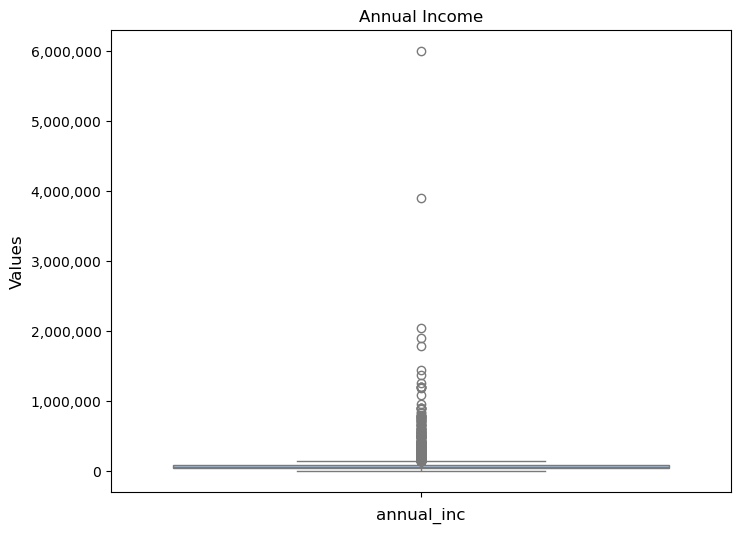

In [44]:
create_boxplot(loan_data, 'annual_inc', 'Annual Income', 'annual_inc')

In [45]:
#checking the quantile range
quantile_info = loan_data['annual_inc'].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50    59000.00
0.75    82000.00
0.90   115000.00
0.95   140004.00
0.97   165000.00
0.98   187000.00
0.99   234000.00
Name: annual_inc, dtype: float64

##### As there are outliers for annual_inc so we are filtering records upto 95 percentile

In [46]:
loan_data = loan_data[loan_data['annual_inc'] < loan_data['annual_inc'].quantile(0.95)]
loan_data.shape

(36594, 21)

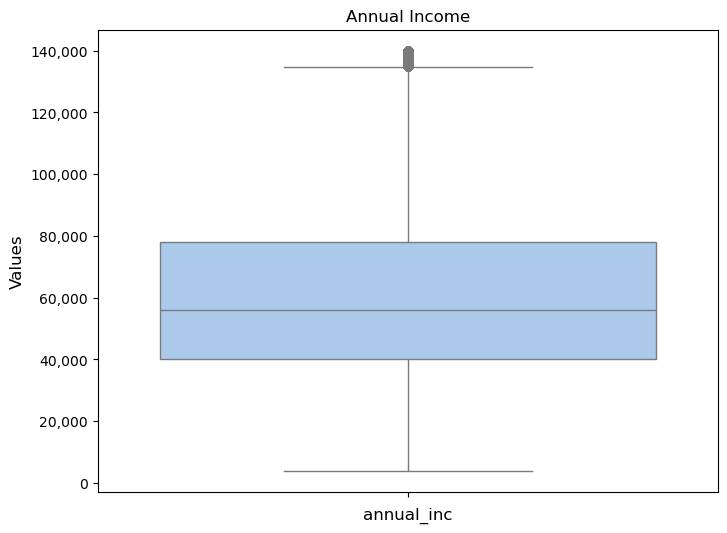

In [47]:
create_boxplot(loan_data, 'annual_inc', 'Annual Income', 'annual_inc')

##### There are outliers for loan_amnt but dat is dristibuted evenly so filtering of records not required

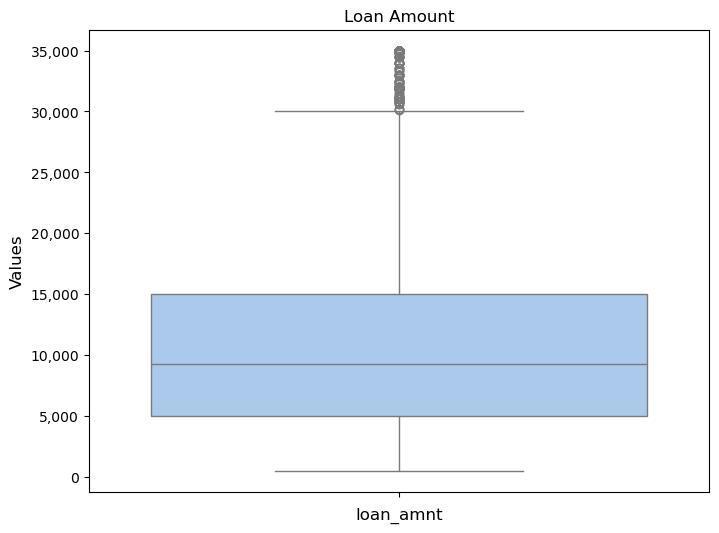

In [48]:
create_boxplot(loan_data, 'loan_amnt', 'Loan Amount', 'loan_amnt')

##### There are no outliers for dti

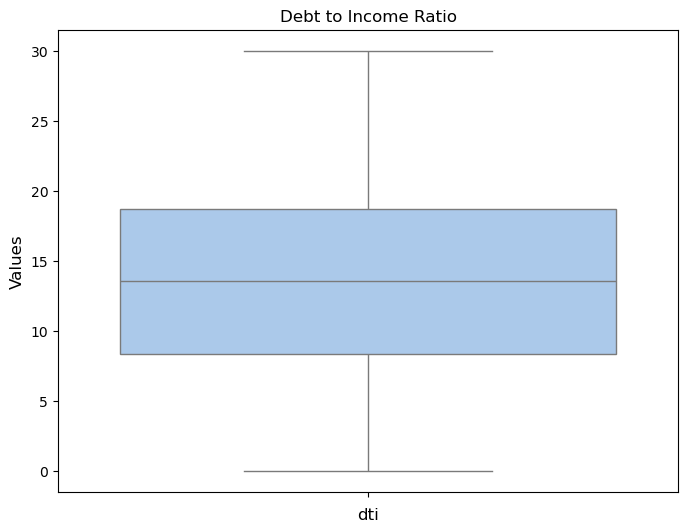

In [49]:
create_boxplot(loan_data, 'dti', 'Debt to Income Ratio', 'dti')

##### There are outliers for int_rate but dat is dristibuted evenly so filtering of records not required

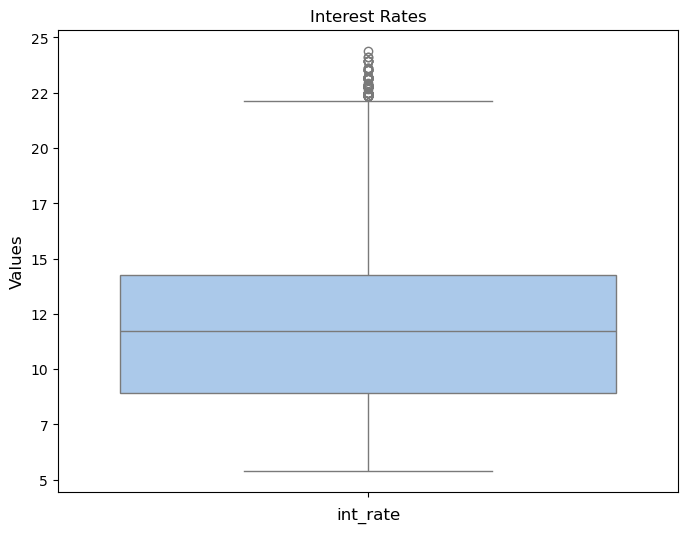

In [50]:
create_boxplot(loan_data, 'int_rate', 'Interest Rates', 'int_rate')

##### There are outliers for funded_amnt_inv but dat is dristibuted evenly so filtering of records not required

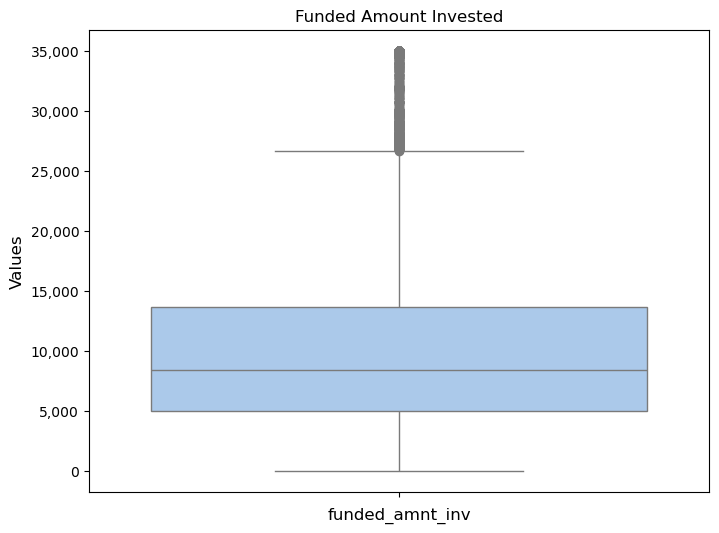

In [51]:
create_boxplot(loan_data, 'funded_amnt_inv', 'Funded Amount Invested', 'funded_amnt_inv')

### 2.9 Observations and Inferences from Boxplots

- The annual income of most of the loan applicants is between **40, 000 - 80, 000 USD**
- The loan amount of most of the loan applicants is between **5, 000 - 15, 000 USD** 
- The debt to income ration is between **8 - 18**
- The interest rate on the loan is between **8% - 14%**
- The funded amount by investor for most of the loan applicants is between **5, 000 - 14, 000 USD**

In [52]:
#Set common theme for all the graphs
sns.set_theme(style="whitegrid")

#Set common pallet for all the graphs
palette = sns.color_palette("Spectral", 10) 

## 3. Data Analysis
1. Created Buckets for Quatitative Data
2. Univariate Analysis
3. Observations and Inferences from Univariate Analysis
4. Bivariate Analysis
5. Observations and Inferences from Bivariate Analysis

### 3.1 Created Bucket for Quatitative Data

In [53]:
bin_edges = [5, 9, 11, 14, 18, float('inf')]
bin_labels = ['5%-9%','9%-11%','11%-14%','14%-18%','18%-25%']
loan_data['int_rate_range'] = pd.cut(loan_data['int_rate'], bins=bin_edges,precision=0, labels=bin_labels)

In [54]:
bin_edges = [0, 40000, 50000, 70000, 90000, float('inf')]
bin_labels = ['Up to $40,000', '$40,000 - $50,000', '$50,000 - $70,000', '$70,000 - $90,000', 'Above $90,000']
loan_data['annual_inc_range'] = pd.cut(loan_data['annual_inc'], bins=bin_edges,precision=0, labels=bin_labels)

In [55]:
bin_edges = [0, 5000, 7500, 12500, 20000, float('inf')]
bin_labels = ['Up to $5,000','$5,000 - $7,500','$7,500 - $12,500','$12,500 - $20,000','Above $20,000']
loan_data['loan_amnt_range'] = pd.cut(loan_data['loan_amnt'], bins=bin_edges,precision =0,labels=bin_labels)

In [56]:
bin_edges = [0, 25, 35, 55, 75, float('inf')]
bin_labels = ['Up to 25%','25% - 35%','35% - 55%','55% - 75%','Above 75%']
loan_data['revol_util_range'] = pd.cut(loan_data['revol_util'], bins=bin_edges,precision =0,labels=bin_labels)

In [57]:
bin_edges = [0, 8, 11, 15, 20, float('inf')]
bin_labels = ['Up to 8','8 - 11','11 - 15','15 - 20','Above 20']
loan_data['dti_range'] = pd.cut(loan_data['dti'], bins=bin_edges,precision =0,labels=bin_labels)

In [58]:
bin_edges = [0, 5000, 8000, 12000, 18000, float('inf')]
bin_labels = ['Up to $5,000','$5,000 - $8,000','$8,000 - $12,000','$12,000 - $18,000','Above $18,000']
loan_data['funded_amnt_inv_range'] = pd.cut(loan_data['funded_amnt_inv'], bins=bin_edges,precision =0,labels=bin_labels)

In [59]:
# Removing grade alphabets and converting sub_grade to numeric
loan_data['sub_grade'] = pd.to_numeric(loan_data['sub_grade'].apply(lambda x : x[-1]))

In [60]:
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Convert 'grade' to a categorical type with a specified order
loan_data['grade'] = pd.Categorical(loan_data['grade'], categories=grade_order, ordered=True)

In [61]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,inq_last_6mths,pub_rec,revol_util,issue_d_month,issue_d_year,quarter,int_rate_range,annual_inc_range,loan_amnt_range,revol_util_range,dti_range,funded_amnt_inv_range
0,5000.00,4975.00,36,10.65,B,2,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,1,0,83.70,12,2011,Q4,9%-11%,"Up to $40,000","Up to $5,000",Above 75%,Above 20,"Up to $5,000"
1,2500.00,2500.00,60,15.27,C,4,0,RENT,30000.00,Verified,2011-12-01,Charged Off,car,GA,1.00,5,0,9.40,12,2011,Q4,14%-18%,"Up to $40,000","Up to $5,000",Up to 25%,Up to 8,"Up to $5,000"
2,2400.00,2400.00,36,15.96,C,5,10,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,2,0,98.50,12,2011,Q4,14%-18%,"Up to $40,000","Up to $5,000",Above 75%,8 - 11,"Up to $5,000"
3,10000.00,10000.00,36,13.49,C,1,10,RENT,49200.00,Verified,2011-12-01,Fully Paid,other,CA,20.00,1,0,21.00,12,2011,Q4,11%-14%,"$40,000 - $50,000","$7,500 - $12,500",Up to 25%,15 - 20,"$8,000 - $12,000"
5,5000.00,5000.00,36,7.90,A,4,3,RENT,36000.00,Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,3,0,28.30,12,2011,Q4,5%-9%,"Up to $40,000","Up to $5,000",25% - 35%,11 - 15,"Up to $5,000"


### 3.2 Univariate Analysis

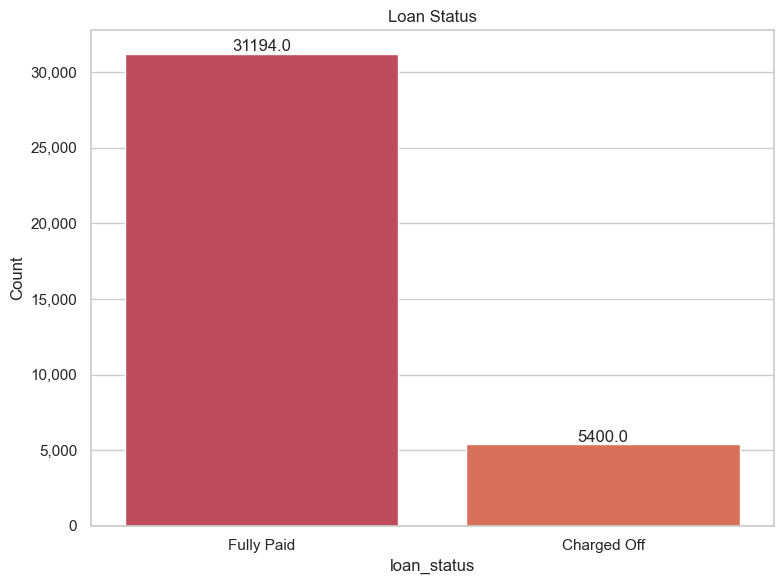

In [62]:
create_countplot(loan_data, x_col='loan_status', title='Loan Status', xlabel='loan_status', palette=palette)

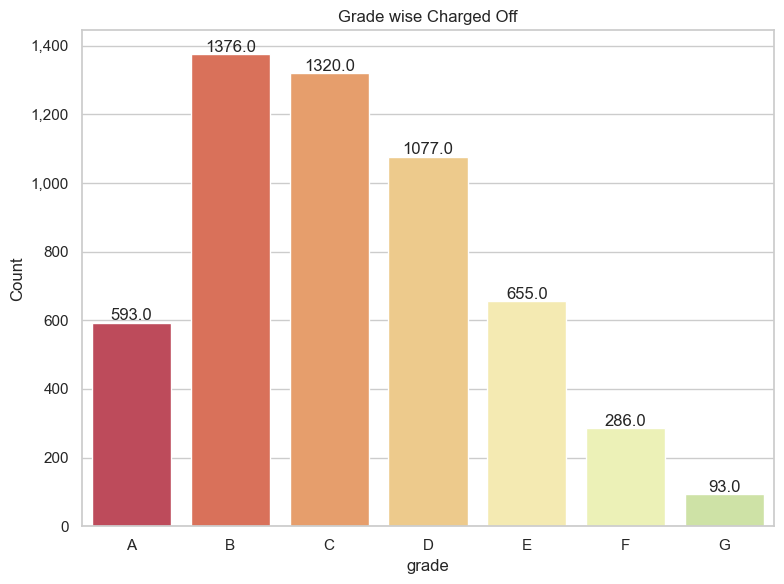

In [63]:
create_countplot(loan_data, x_col='grade', title='Grade wise Charged Off', xlabel='grade', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], 
                 filter_col='loan_status', filter_value='Charged Off', palette=palette)

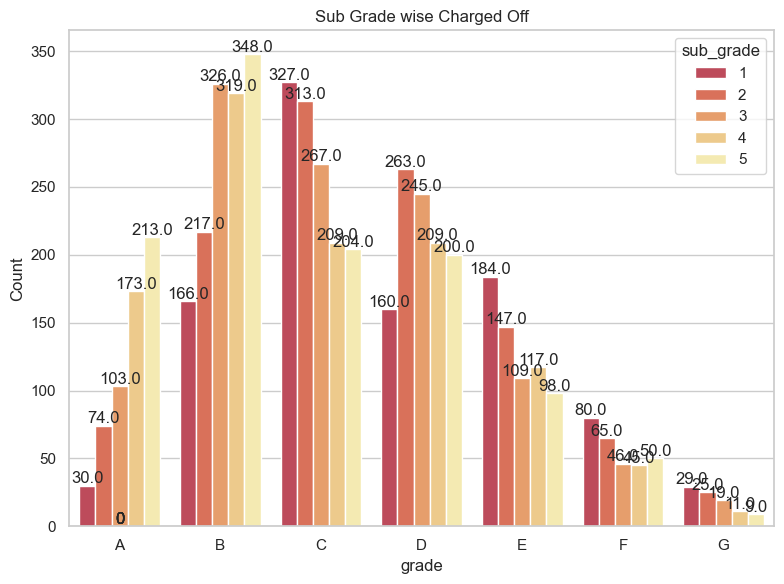

In [64]:
create_countplot(loan_data, x_col='grade', title='Sub Grade wise Charged Off', xlabel='grade', hue_col='sub_grade', 
                 order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], filter_col='loan_status', filter_value='Charged Off', palette=palette)

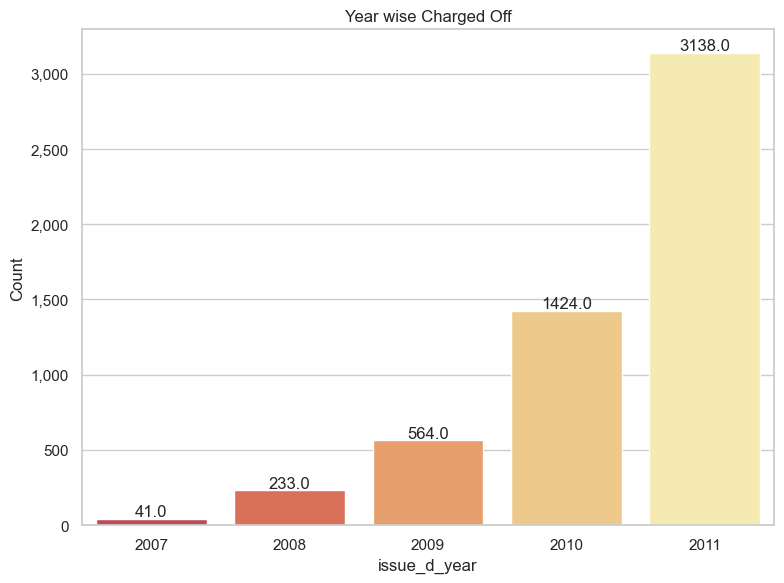

In [65]:
create_countplot(loan_data, x_col='issue_d_year', title='Year wise Charged Off', xlabel='issue_d_year', filter_col='loan_status',
                 filter_value='Charged Off', palette=palette)

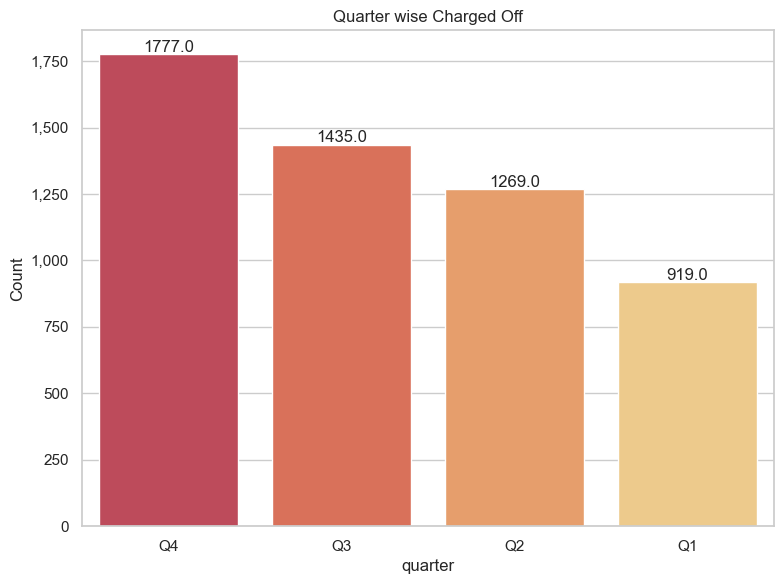

In [66]:
create_countplot(loan_data, x_col='quarter', title='Quarter wise Charged Off', xlabel='quarter', filter_col='loan_status', 
                 filter_value='Charged Off', palette=palette)

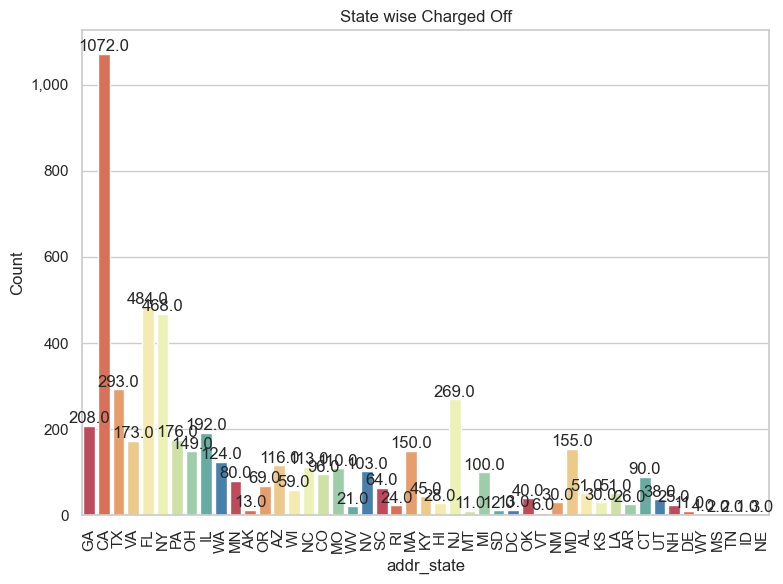

In [67]:
create_countplot(loan_data, x_col='addr_state', title='State wise Charged Off', xlabel='addr_state', filter_col='loan_status', 
                 filter_value='Charged Off', rotate_x_labels=True, palette=palette)

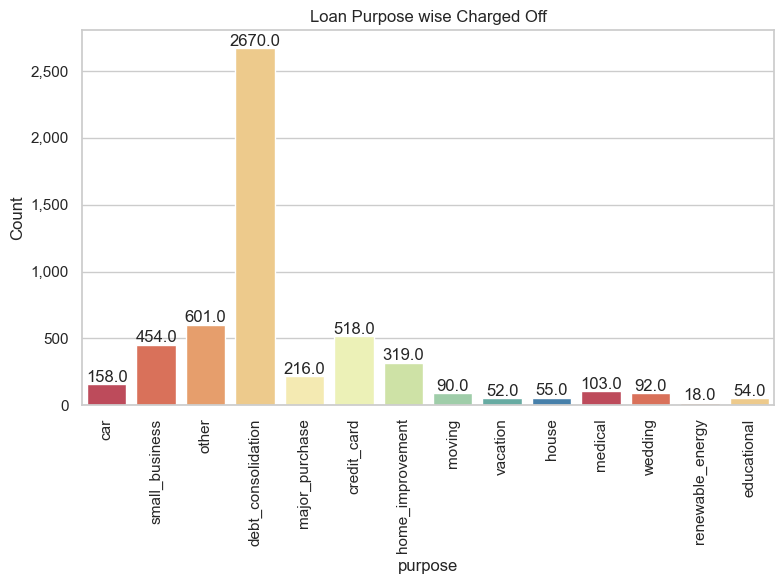

In [68]:
create_countplot(loan_data, x_col='purpose', title='Loan Purpose wise Charged Off', xlabel='purpose', filter_col='loan_status', 
                 filter_value='Charged Off', rotate_x_labels=True, palette=palette)

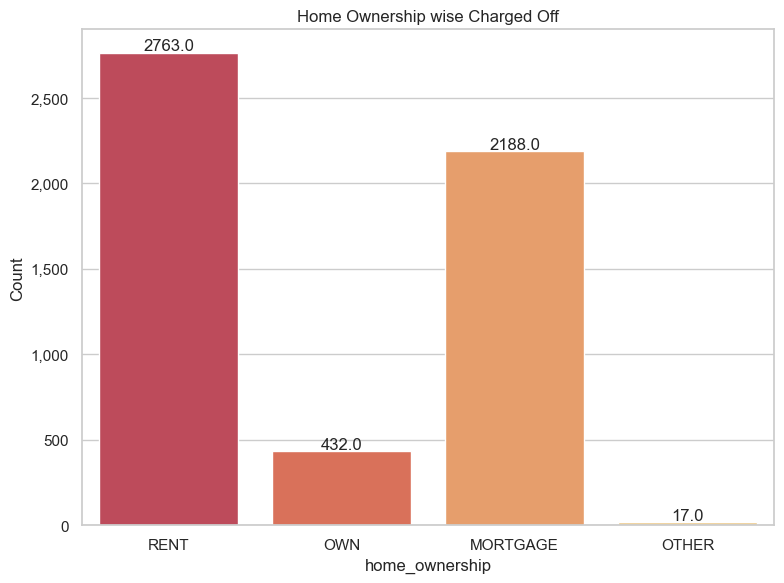

In [69]:
create_countplot(loan_data, x_col='home_ownership', title='Home Ownership wise Charged Off', xlabel='home_ownership', 
                 filter_col='loan_status', filter_value='Charged Off', palette=palette)

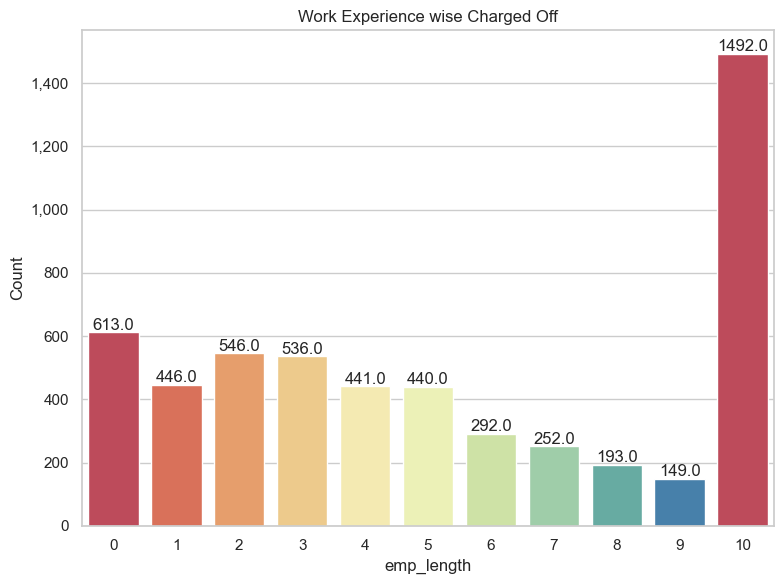

In [70]:
create_countplot(loan_data, x_col='emp_length', title='Work Experience wise Charged Off', xlabel='emp_length', 
                 filter_col='loan_status', filter_value='Charged Off', palette=palette)

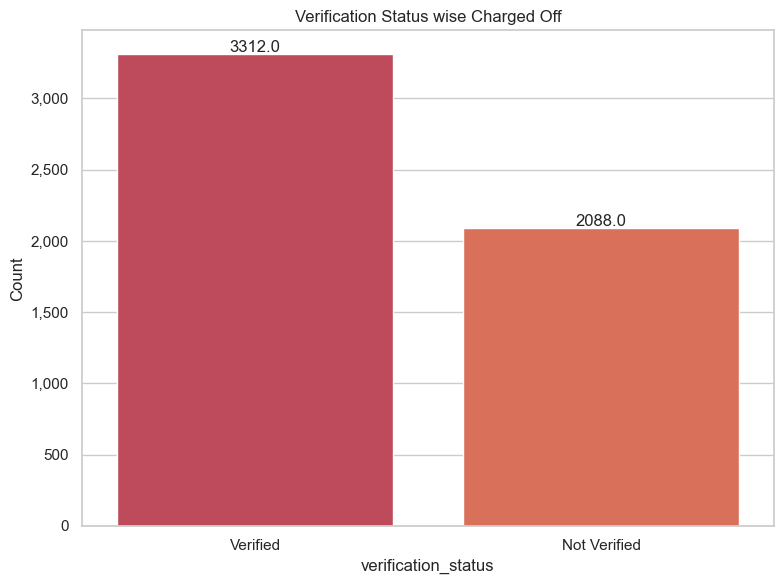

In [71]:
create_countplot(loan_data, x_col='verification_status', title='Verification Status wise Charged Off', xlabel='verification_status', 
                 filter_col='loan_status', filter_value='Charged Off', palette=palette)

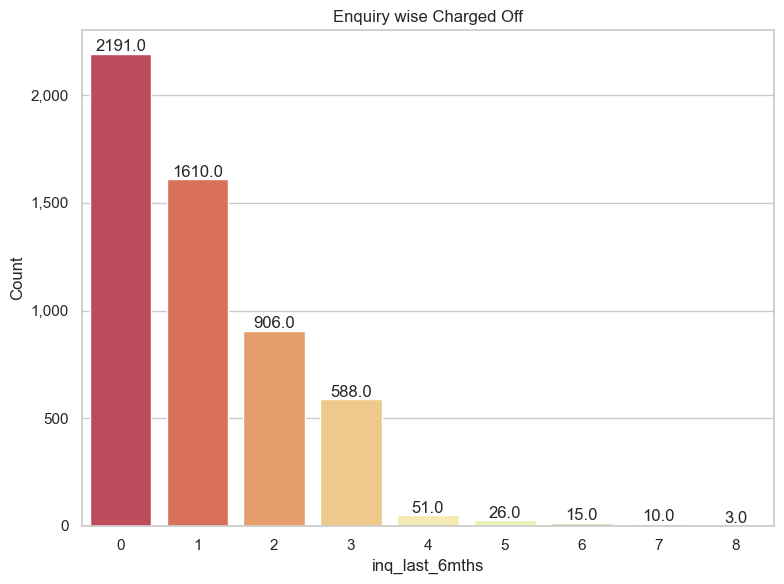

In [72]:
create_countplot(loan_data, x_col='inq_last_6mths', title='Enquiry wise Charged Off', xlabel='inq_last_6mths', filter_col='loan_status', 
                 filter_value='Charged Off', palette=palette)

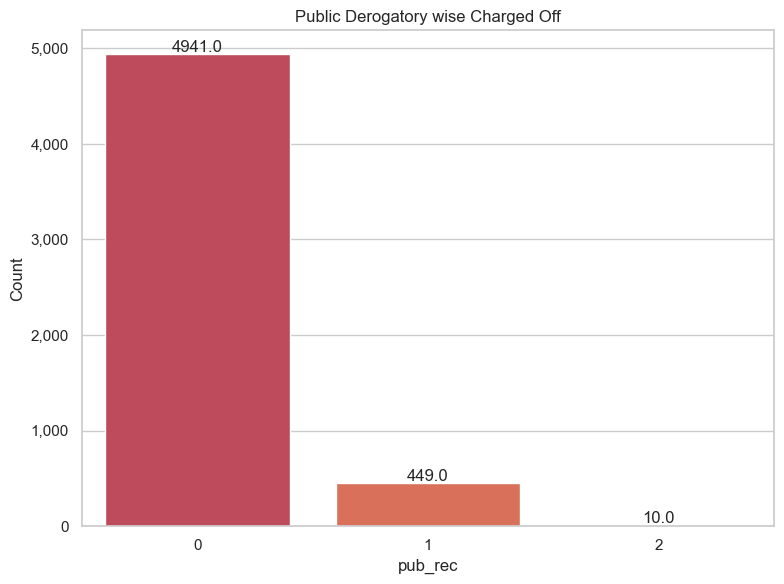

In [73]:
create_countplot(loan_data, x_col='pub_rec', title='Public Derogatory wise Charged Off', xlabel='pub_rec', filter_col='loan_status', 
                 filter_value='Charged Off', palette=palette)

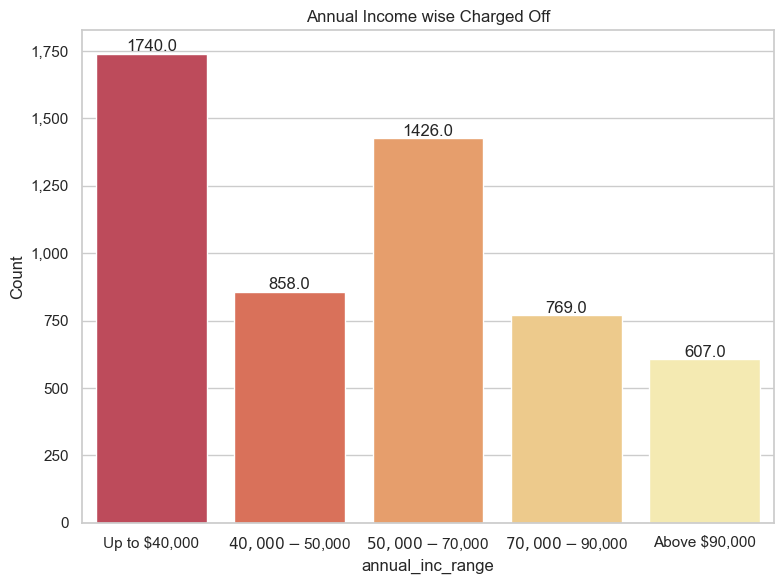

In [74]:
create_countplot(loan_data, x_col='annual_inc_range', title='Annual Income wise Charged Off', xlabel='annual_inc_range', 
                 filter_col='loan_status', filter_value='Charged Off', palette=palette)

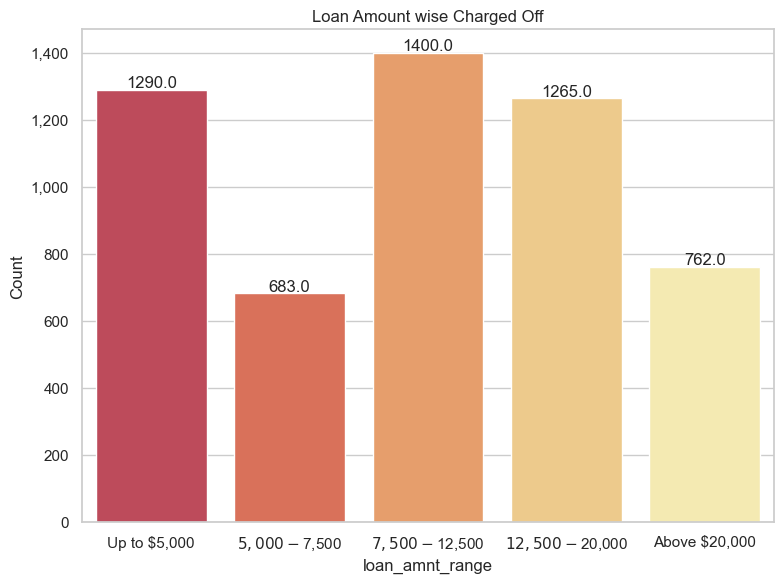

In [75]:
create_countplot(loan_data, x_col='loan_amnt_range', title='Loan Amount wise Charged Off', xlabel='loan_amnt_range', 
                 filter_col='loan_status', filter_value='Charged Off', palette=palette)

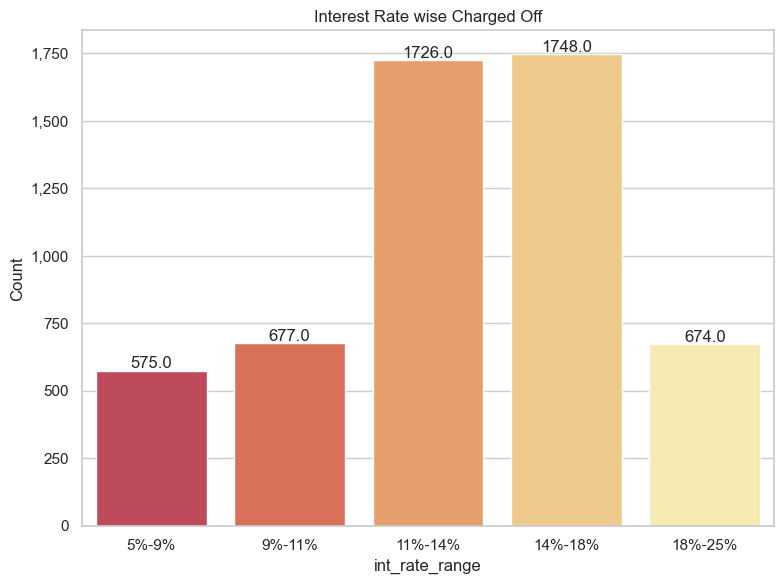

In [76]:
create_countplot(loan_data, x_col='int_rate_range', title='Interest Rate wise Charged Off', xlabel='int_rate_range', 
                 filter_col='loan_status', filter_value='Charged Off', palette=palette)

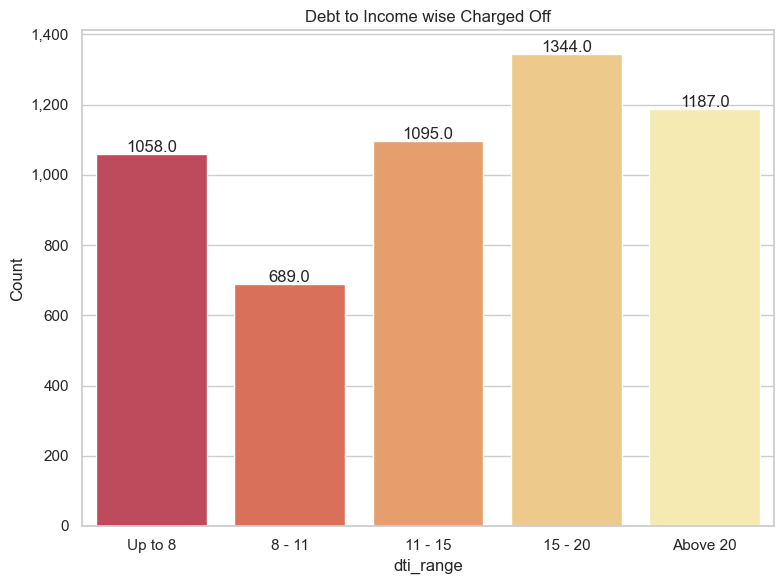

In [77]:
create_countplot(loan_data, x_col='dti_range', title='Debt to Income wise Charged Off', xlabel='dti_range', 
                 filter_col='loan_status', filter_value='Charged Off', palette=palette)

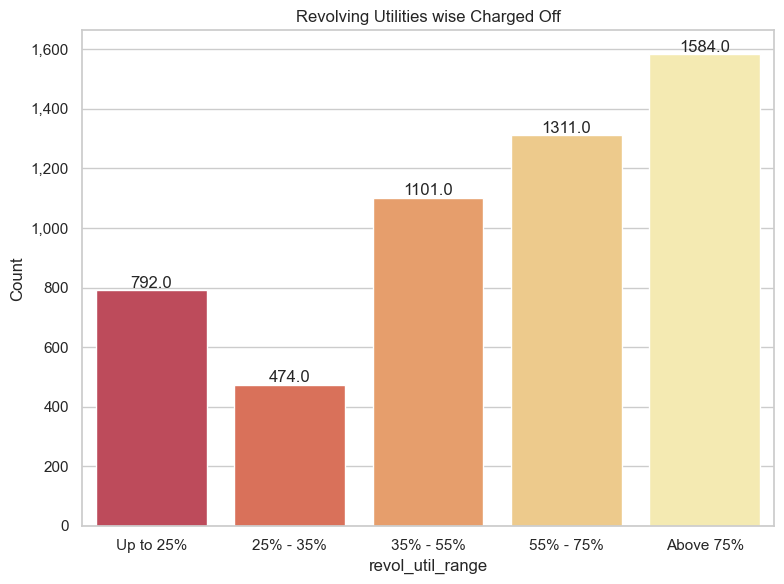

In [78]:
create_countplot(loan_data, x_col='revol_util_range', title='Revolving Utilities wise Charged Off', xlabel='revol_util_range', 
                 filter_col='loan_status', filter_value='Charged Off', palette=palette)

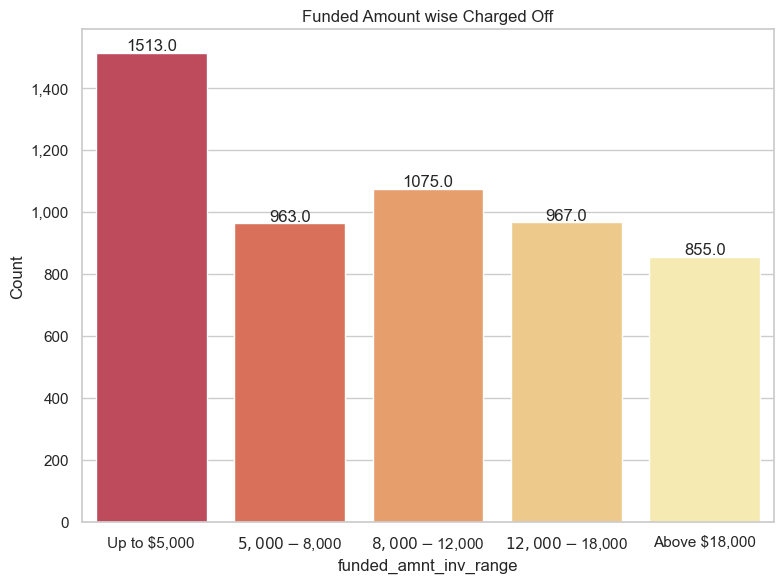

In [79]:
create_countplot(loan_data, x_col='funded_amnt_inv_range', title='Funded Amount wise Charged Off', xlabel='funded_amnt_inv_range', 
                 filter_col='loan_status', filter_value='Charged Off', palette=palette)

### 3.3 Observations and Inferences from Univariate Analysis

### 3.4 Bivariate Analysis

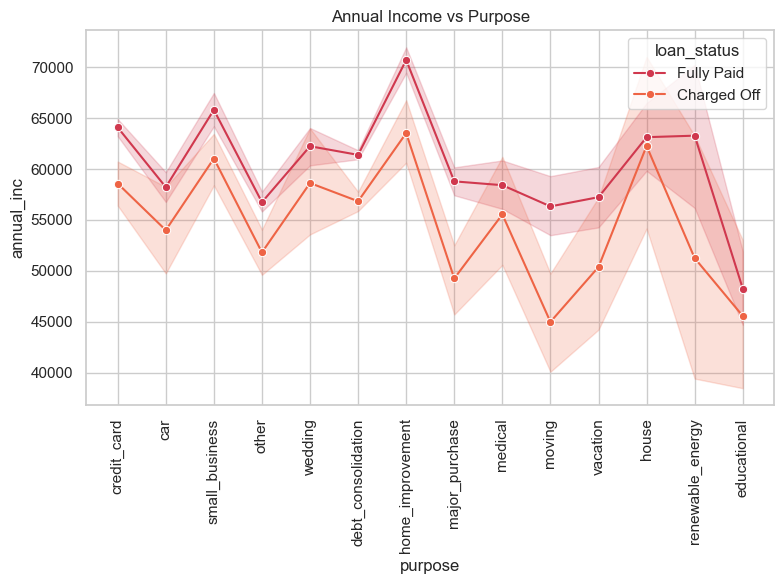

In [80]:
create_lineplot(x_column='purpose', y_column='annual_inc', data=loan_data, hue_column='loan_status',
               title='Annual Income vs Purpose', xlabel='purpose', ylabel='annual_inc', palette=palette, rotation=90)

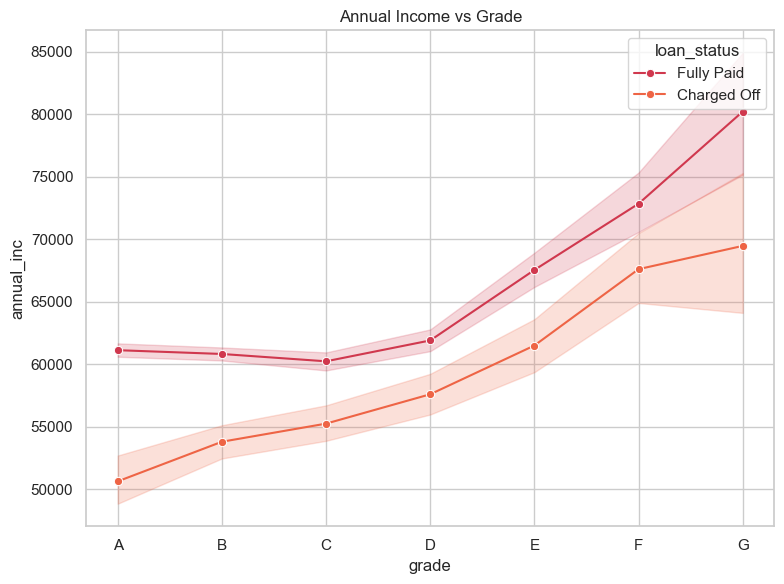

In [81]:
create_lineplot(x_column='grade', y_column='annual_inc', data=loan_data, hue_column='loan_status',
               title='Annual Income vs Grade', xlabel='grade', ylabel='annual_inc', palette=palette)

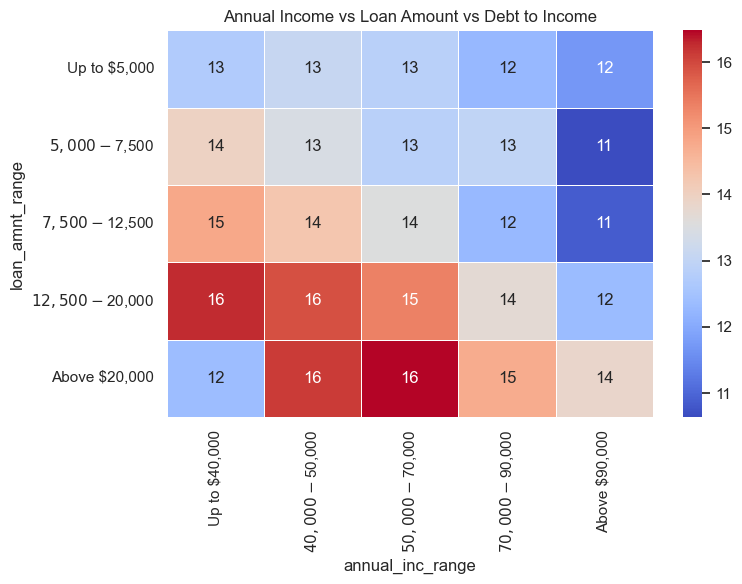

In [82]:
df_aggregated = loan_data.groupby(['annual_inc_range', 'loan_amnt_range']).agg({'dti': 'median'}).reset_index()
heatmap_data = df_aggregated.pivot(index='loan_amnt_range', columns='annual_inc_range', values='dti')

create_heatmap(heatmap_data, 'Annual Income vs Loan Amount vs Debt to Income')

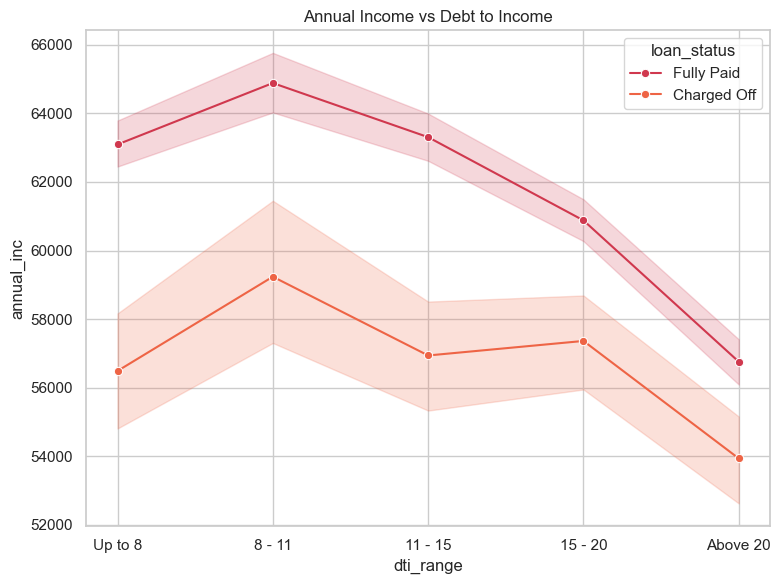

In [83]:
create_lineplot(x_column='dti_range', y_column='annual_inc', data=loan_data, hue_column='loan_status',
               title='Annual Income vs Debt to Income', xlabel='dti_range', ylabel='annual_inc', palette=palette)

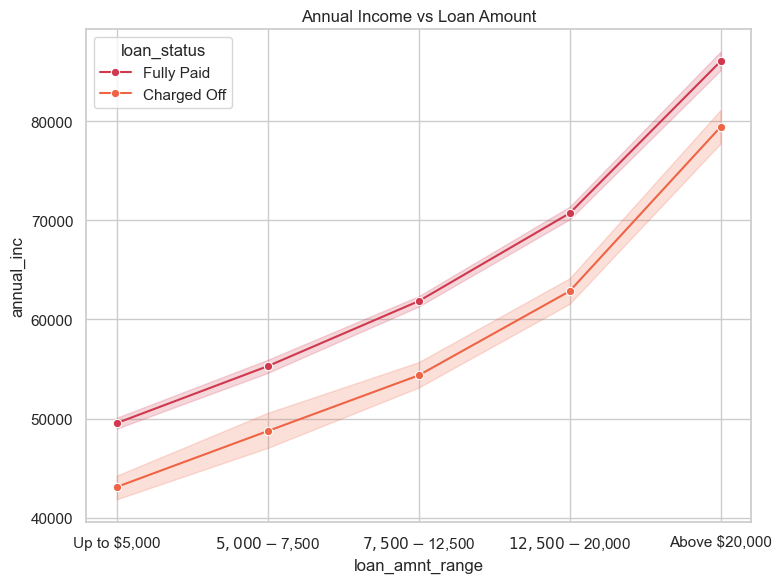

In [84]:
create_lineplot(x_column='loan_amnt_range', y_column='annual_inc', data=loan_data, hue_column='loan_status',
               title='Annual Income vs Loan Amount', xlabel='loan_amnt_range', ylabel='annual_inc', palette=palette)

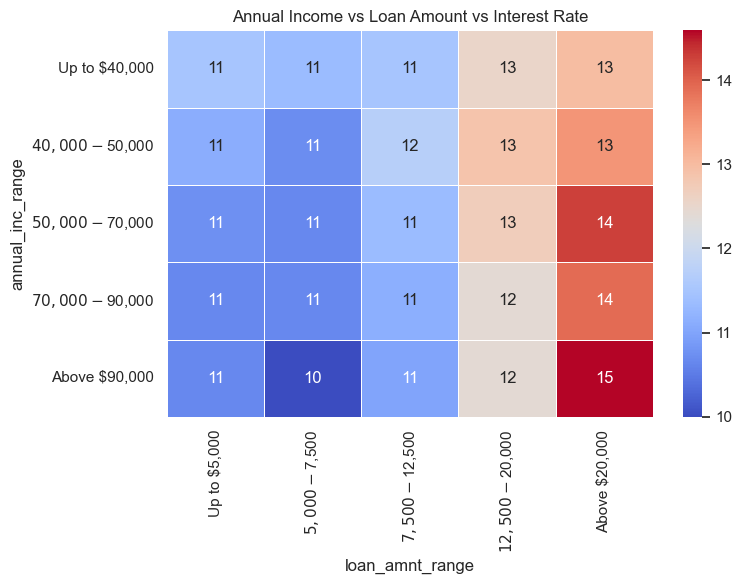

In [85]:
df_aggregated = loan_data.groupby(['annual_inc_range', 'loan_amnt_range']).agg({'int_rate': 'median'}).reset_index()
heatmap_data = df_aggregated.pivot(index='annual_inc_range', columns='loan_amnt_range', values='int_rate')

create_heatmap(heatmap_data, 'Annual Income vs Loan Amount vs Interest Rate')

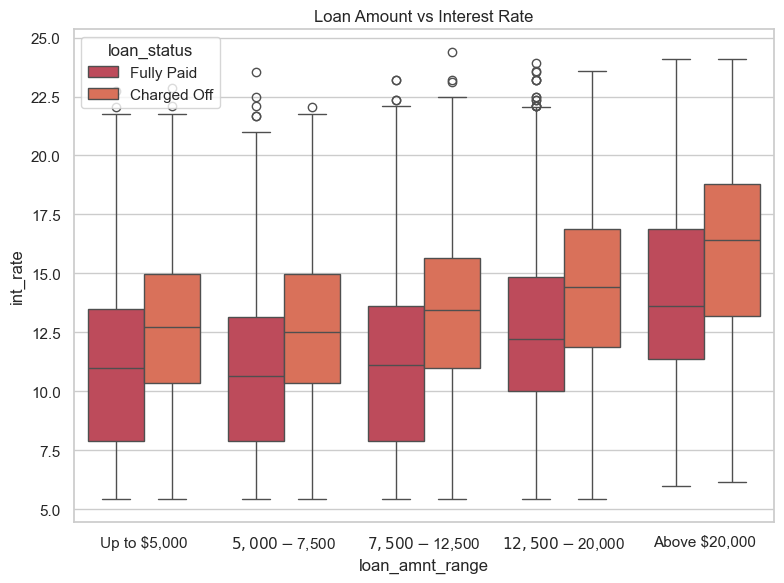

In [86]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_amnt_range', y='int_rate', hue='loan_status', data=loan_data,palette=palette)
plt.title('Loan Amount vs Interest Rate')
plt.xlabel('loan_amnt_range', fontsize=12)
plt.ylabel('int_rate', fontsize=12)
plt.tight_layout()
plt.show()

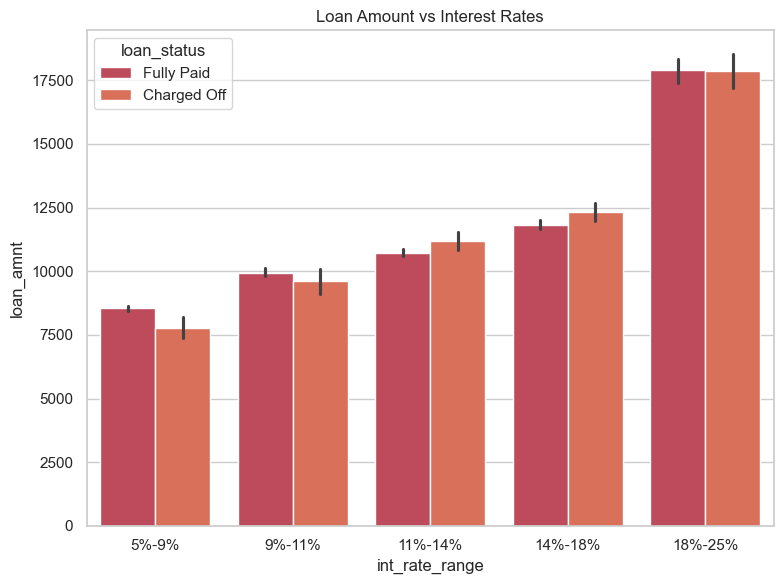

In [87]:
create_barplot(x_column='int_rate_range', y_column='loan_amnt', data=loan_data, hue_column='loan_status',
               title='Loan Amount vs Interest Rates', xlabel='int_rate_range', ylabel='loan_amnt', palette=palette)

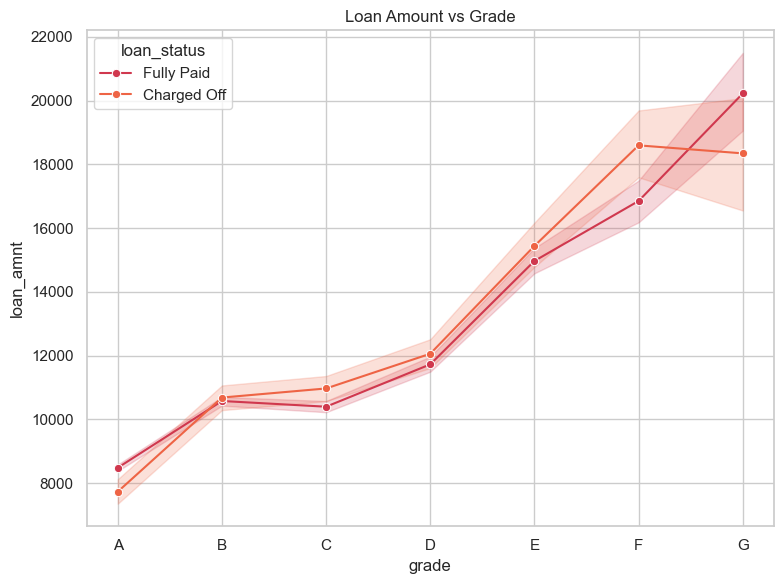

In [88]:
create_lineplot(x_column='grade', y_column='loan_amnt', data=loan_data, hue_column='loan_status',
               title='Loan Amount vs Grade', xlabel='grade', ylabel='loan_amnt', palette=palette)

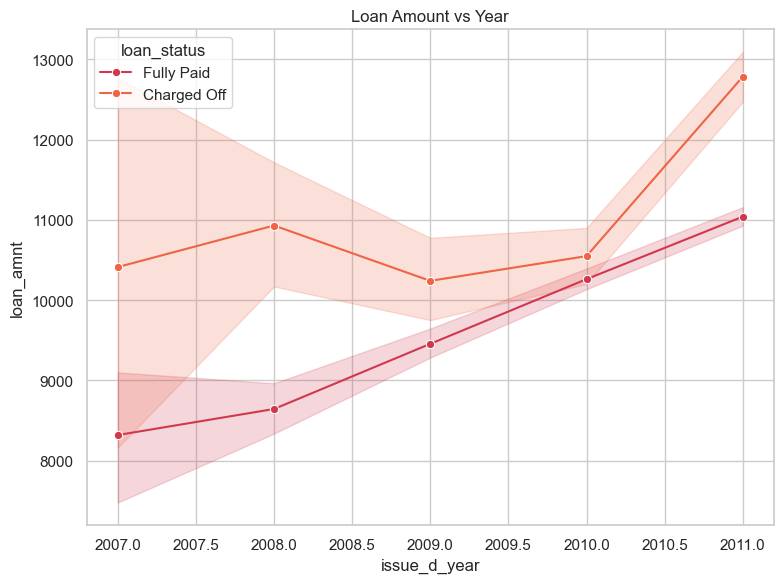

In [89]:
create_lineplot(x_column='issue_d_year', y_column='loan_amnt', data=loan_data, hue_column='loan_status',
               title='Loan Amount vs Year', xlabel='issue_d_year', ylabel='loan_amnt', palette=palette)

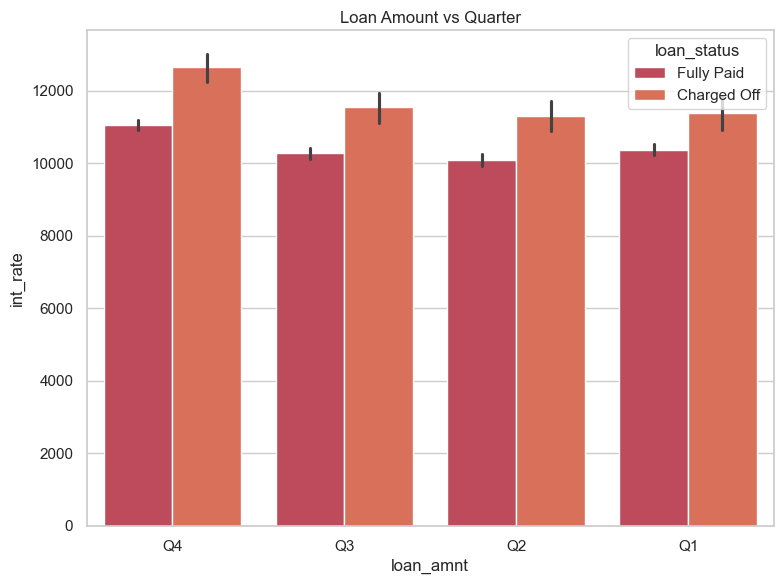

In [90]:
create_barplot(x_column='quarter', y_column='loan_amnt', data=loan_data, hue_column='loan_status',
               title='Loan Amount vs Quarter', xlabel='loan_amnt', ylabel='int_rate', palette=palette)

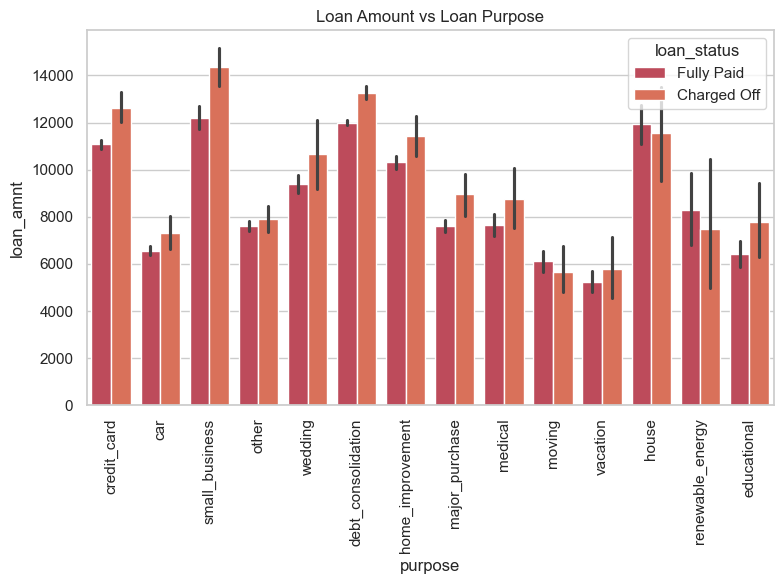

In [91]:
create_barplot(x_column='purpose', y_column='loan_amnt', data=loan_data, hue_column='loan_status',
               title='Loan Amount vs Loan Purpose', xlabel='purpose', ylabel='loan_amnt', palette=palette, rotation=90)

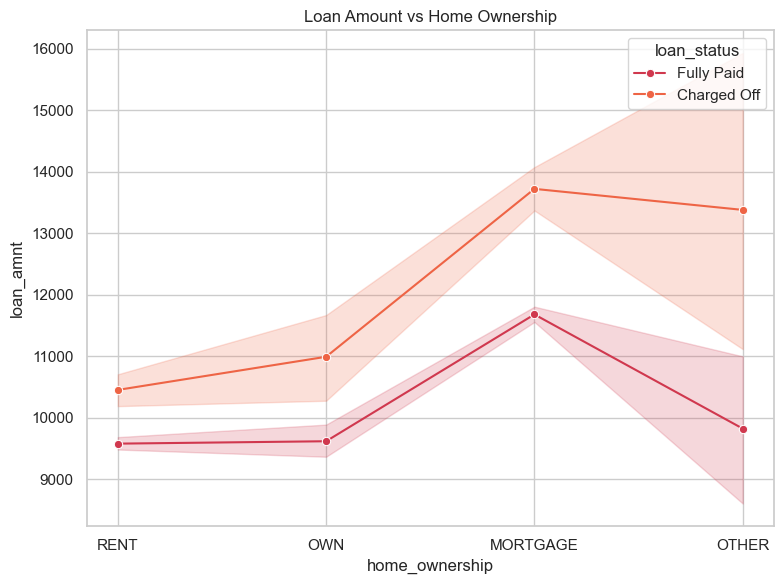

In [92]:
create_lineplot(x_column='home_ownership', y_column='loan_amnt', data=loan_data, hue_column='loan_status',
               title='Loan Amount vs Home Ownership', xlabel='home_ownership', ylabel='loan_amnt', palette=palette)

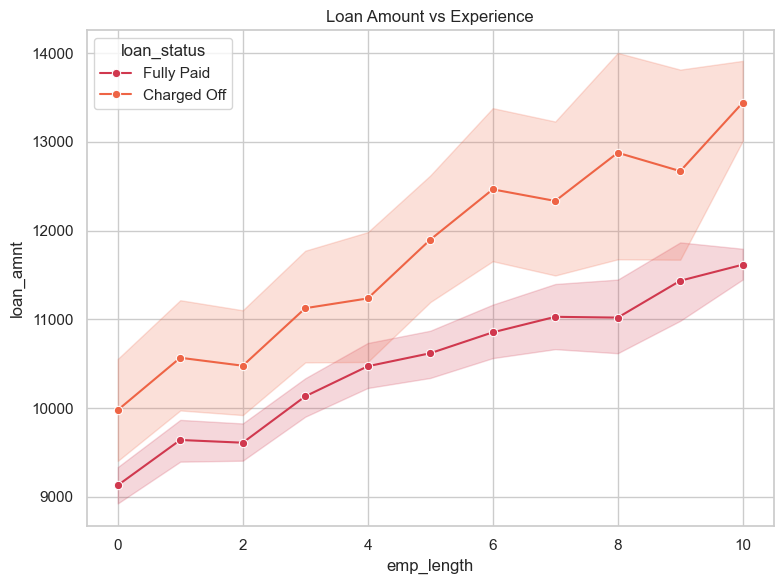

In [93]:
create_lineplot(x_column='emp_length', y_column='loan_amnt', data=loan_data, hue_column='loan_status',
               title='Loan Amount vs Experience', xlabel='emp_length', ylabel='loan_amnt', palette=palette)

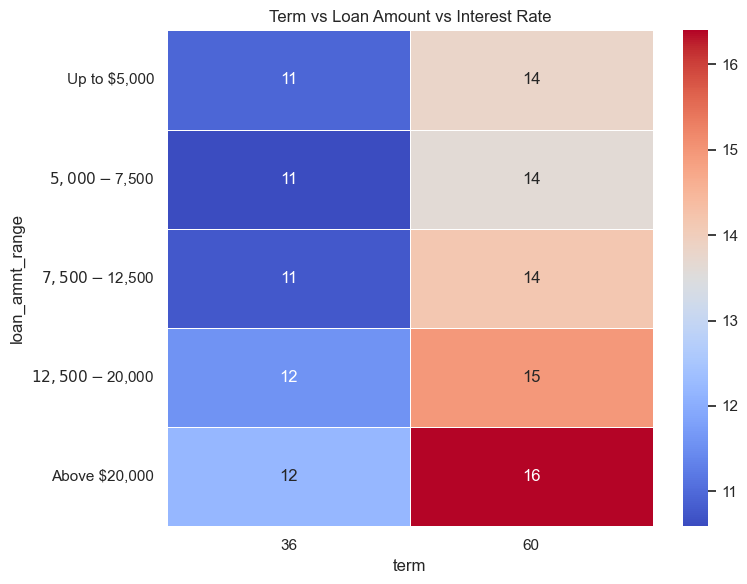

In [94]:
df_aggregated = loan_data.groupby(['term', 'loan_amnt_range']).agg({'int_rate': 'median'}).reset_index()
heatmap_data = df_aggregated.pivot(index='loan_amnt_range', columns='term', values='int_rate')

create_heatmap(heatmap_data, 'Term vs Loan Amount vs Interest Rate')

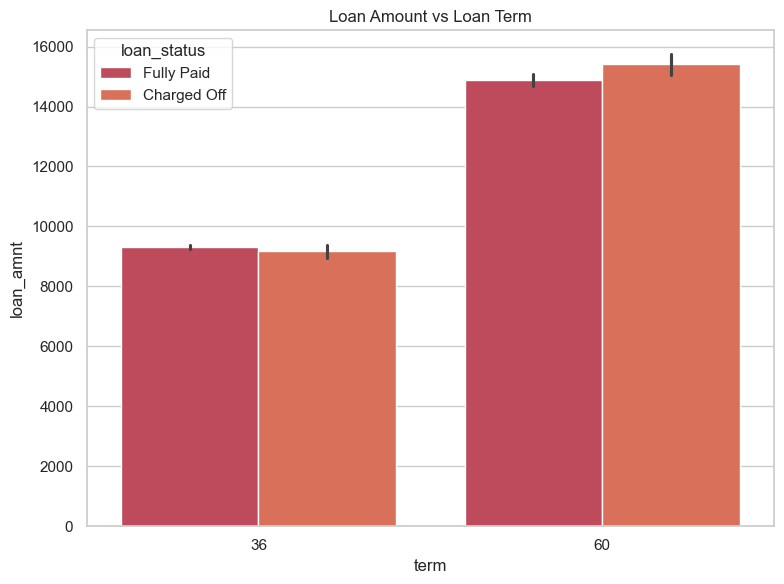

In [95]:
create_barplot(x_column='term', y_column='loan_amnt', data=loan_data, hue_column='loan_status',
               title='Loan Amount vs Loan Term', xlabel='term', ylabel='loan_amnt', palette=palette)

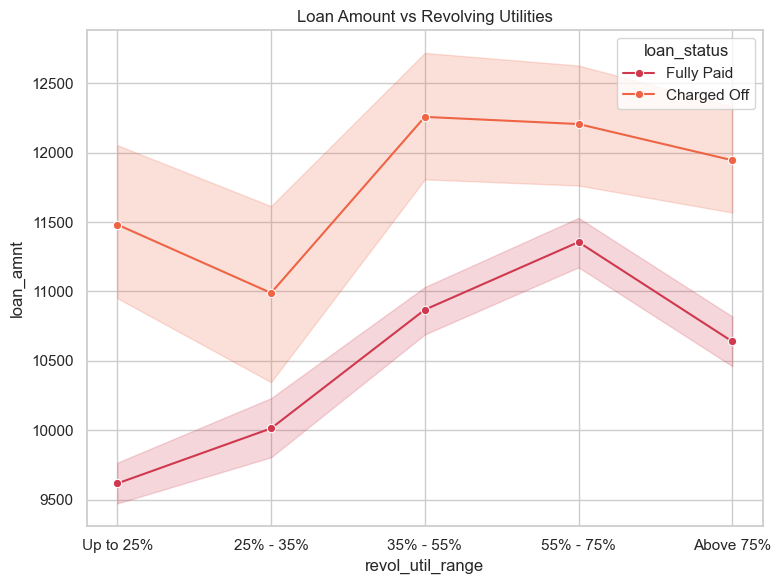

In [96]:
create_lineplot(x_column='revol_util_range', y_column='loan_amnt', data=loan_data, hue_column='loan_status',
               title='Loan Amount vs Revolving Utilities', xlabel='revol_util_range', ylabel='loan_amnt', palette=palette)

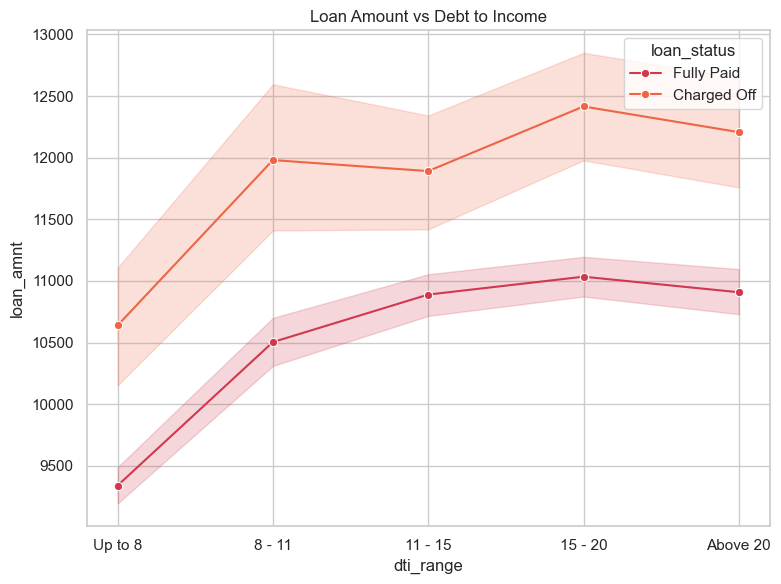

In [97]:
create_lineplot(x_column='dti_range', y_column='loan_amnt', data=loan_data, hue_column='loan_status',
               title='Loan Amount vs Debt to Income', xlabel='dti_range', ylabel='loan_amnt', palette=palette)

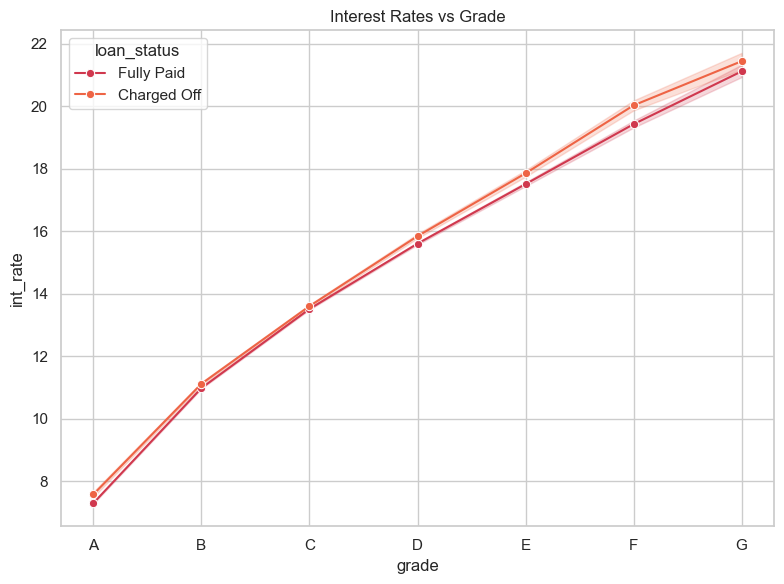

In [98]:
create_lineplot(x_column='grade', y_column='int_rate', data=loan_data, hue_column='loan_status',
               title='Interest Rates vs Grade', xlabel='grade', ylabel='int_rate', palette=palette)

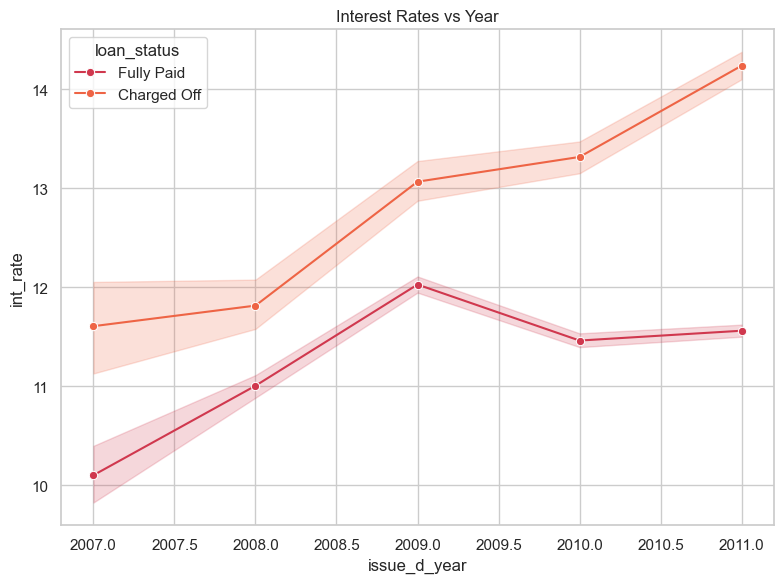

In [99]:
create_lineplot(x_column='issue_d_year', y_column='int_rate', data=loan_data, hue_column='loan_status',
               title='Interest Rates vs Year', xlabel='issue_d_year', ylabel='int_rate', palette=palette)

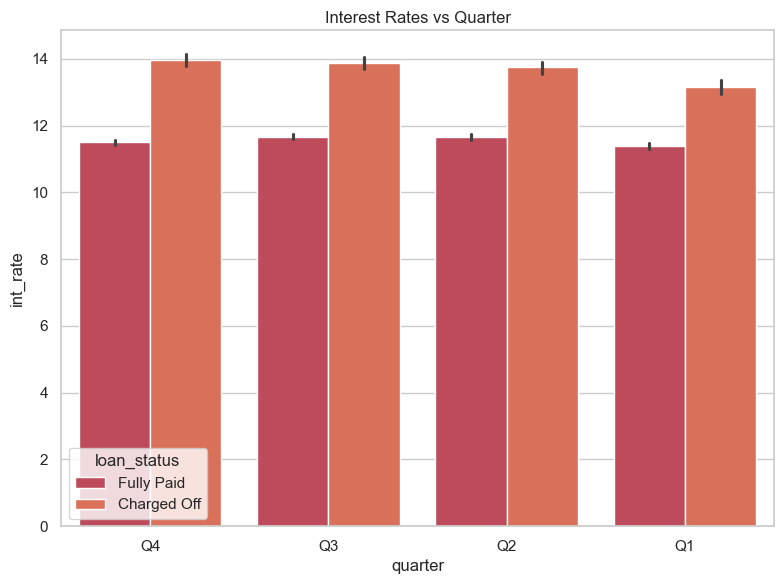

In [100]:
create_barplot(x_column='quarter', y_column='int_rate', data=loan_data, hue_column='loan_status',
               title='Interest Rates vs Quarter', xlabel='quarter', ylabel='int_rate', palette=palette)

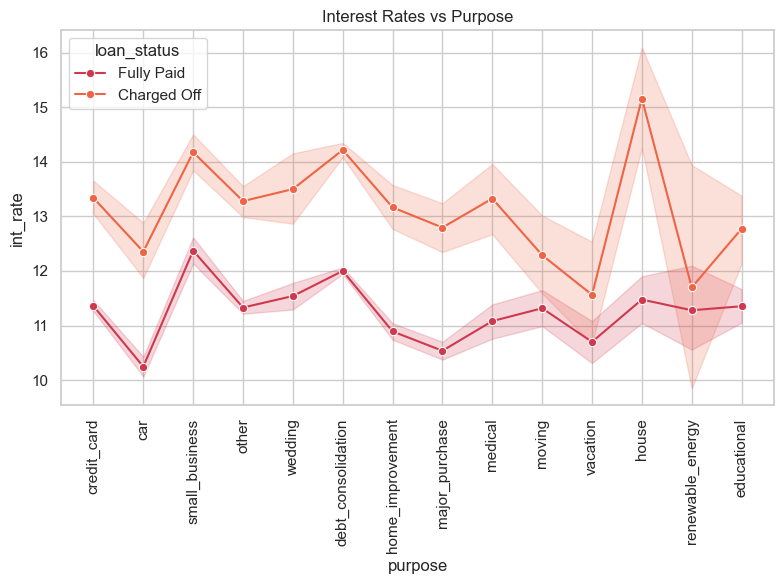

In [101]:
create_lineplot(x_column='purpose', y_column='int_rate', data=loan_data, hue_column='loan_status',
               title='Interest Rates vs Purpose', xlabel='purpose', ylabel='int_rate', palette=palette, rotation=90)

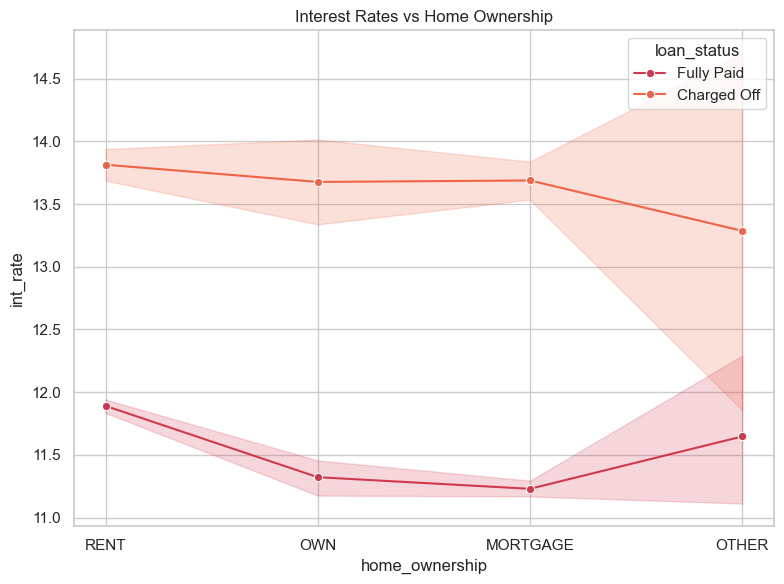

In [102]:
create_lineplot(x_column='home_ownership', y_column='int_rate', data=loan_data, hue_column='loan_status',
               title='Interest Rates vs Home Ownership', xlabel='home_ownership', ylabel='int_rate', palette=palette)

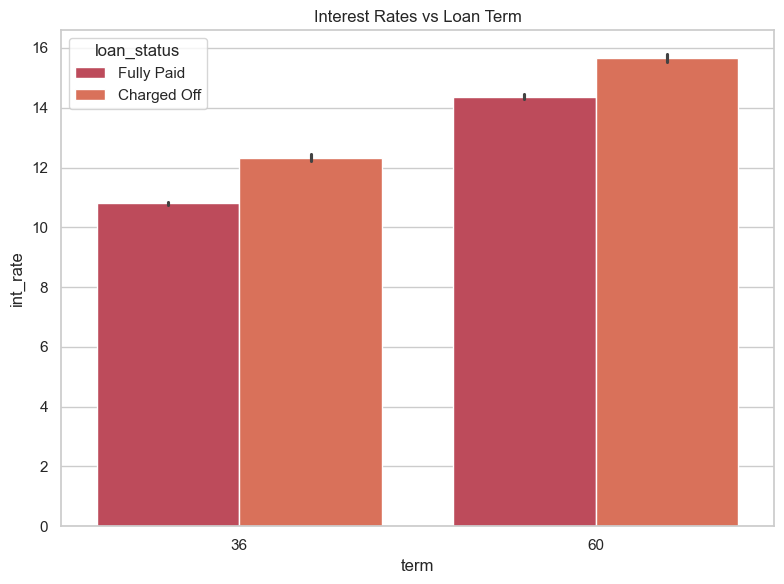

In [103]:
create_barplot(x_column='term', y_column='int_rate', data=loan_data, hue_column='loan_status',
               title='Interest Rates vs Loan Term', xlabel='term', ylabel='int_rate', palette=palette)

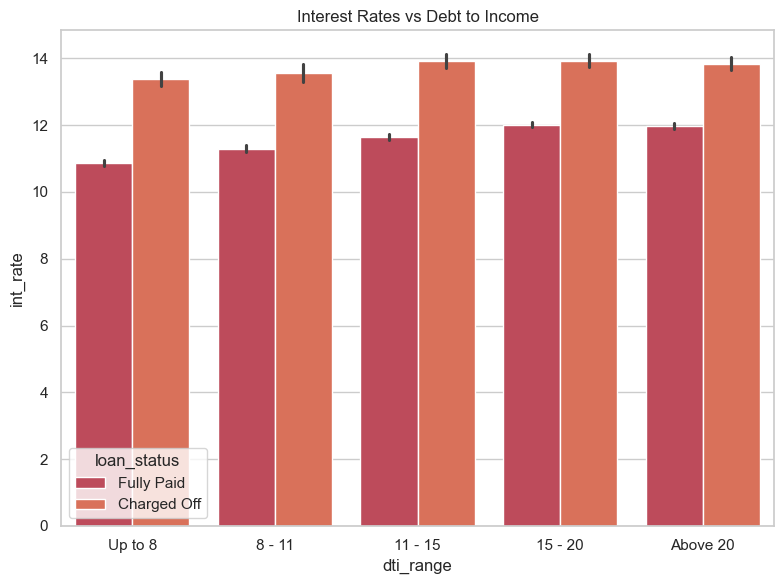

In [104]:
create_barplot(x_column='dti_range', y_column='int_rate', data=loan_data, hue_column='loan_status',
               title='Interest Rates vs Debt to Income', xlabel='dti_range', ylabel='int_rate', palette=palette)

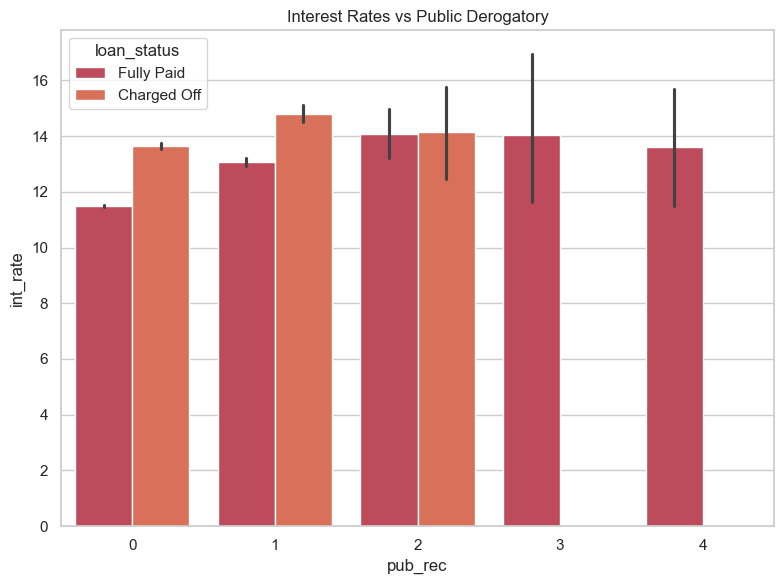

In [105]:
create_barplot(x_column='pub_rec', y_column='int_rate', data=loan_data, hue_column='loan_status',
               title='Interest Rates vs Public Derogatory', xlabel='pub_rec', ylabel='int_rate', palette=palette)

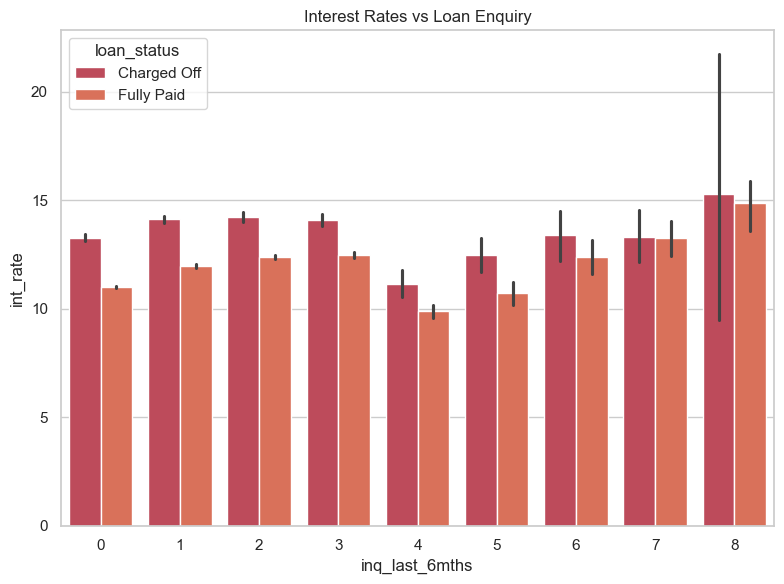

In [106]:
create_barplot(x_column='inq_last_6mths', y_column='int_rate', data=loan_data, hue_column='loan_status',
               title='Interest Rates vs Loan Enquiry', xlabel='inq_last_6mths', ylabel='int_rate', palette=palette)

### 3.5 Observations and Inferences from Bivariate Analysis